<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">   
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Вступление к работе</h3>
    <p>Этот проект посвящён анализу <b>реальных данных</b> из онлайн-платформы <b>Instacart Market</b> — крупнейшего маркетплейса в Северной Америке, который связывает покупателей с локальными супермаркетами и предоставляет доставку продуктов на дом. В отличие от синтетических или учебных датасетов, эти данные отражают реальное поведение клиентов: как часто они покупают продукты, какие товары заказывают повторно и в какое время формируют корзины.</p>
    <p><b>Основные цели анализа:</b></p>
    <ol>
        <li>Провести <b>сегментацию покупателей</b> и выявить наиболее ценные группы.</li>
        <li>Изучить <b>поведение при заказе</b>: повторные покупки, структура корзины, частота и регулярность заказов.</li>
        <li>Построить <b>ABC-XYZ и RFM-анализ</b>, чтобы оценить ценность клиентов и товаров.</li>
        <li>Определить <b>ключевые продукты</b> (лидеры и «хвост») по частоте и вероятности повторного заказа.</li>
        <li>Проанализировать <b>временные паттерны</b> заказов (часы и дни недели).</li>
    </ol>
    <p><b>Почему это важно?</b> Для бизнеса такие данные позволяют точнее планировать маркетинговые кампании, ассортимент и логистику. Для аналитика проект — отличная возможность отработать практические инструменты анализа и выявить реальные закономерности поведения клиентов.</p>
    Объяснения и выводы будут представлены на русском и английском языках на протяжении всего проекта.

<div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
    English:
</div>
<h3>Introduction</h3>
<p>This project is based on <b>real-world data</b> from <b>Instacart Market</b> — one of the largest online grocery platforms in North America, connecting customers with local supermarkets and delivering groceries to their doors. Unlike synthetic or toy datasets, these data reflect actual customer behavior: what they buy, how often they reorder products, and when they place their orders.</p>
<p><b>Main goals of the analysis:</b></p>
<ol>
    <li>Perform <b>customer segmentation</b> to identify the most valuable groups.</li>
    <li>Explore <b>shopping behavior</b>: reorder patterns, cart structure, order frequency and regularity.</li>
    <li>Apply <b>ABC-XYZ and RFM analysis</b> to assess customer and product value.</li>
    <li>Identify <b>key products</b> (top sellers and low performers) by frequency and reorder rate.</li>
    <li>Analyze <b>temporal patterns</b> of orders (by hour and day of week).</li>
</ol>
<p><b>Why it matters?</b> Insights help optimize marketing campaigns, assortment planning, and logistics. For analysts, this dataset provides a great opportunity to practice end-to-end analysis and uncover real behavioral trends.</p>

Explanations and conclusions will be presented in Russian and English throughout the project.


</div>


# <span style="color:transparent;">1. Setting Up the Environment & Importing Data</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Setting Up the Environment & Importing Data
    </div>
</div>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import missingno as msno 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
aisles = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/departments.csv')
order_products__prior = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv')
order_products__train = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')
orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv')

# <span style="color:transparent;">2. Cleaning and Preparing the Initial Tables</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Cleaning and Preparing the Initial Tables
    </div>
</div>


In [3]:
aisles['aisle']= pd.Categorical(aisles['aisle'])

display(aisles.info())
print('\n')
display(aisles.head(3))
print('\n')
print('Missing values:')
display(aisles.isna().sum())
print('\n')
print('Duplicates:')
display(aisles.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int64   
 1   aisle     134 non-null    category
dtypes: category(1), int64(1)
memory usage: 6.6 KB


None

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars




Missing values:


aisle_id    0
aisle       0
dtype: int64



Duplicates:


0

---

In [4]:
departments['department']= pd.Categorical(departments['department'])

display(departments.info())
print('\n')
display(departments.head(3))
print('\n')
print('Missing values:')
display(departments.isna().sum())
print('\n')
print('Duplicates:')
display(departments.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     category
dtypes: category(1), int64(1)
memory usage: 1.0 KB


None

,department_id,department
0,1,frozen
1,2,other
2,3,bakery




Missing values:


department_id    0
department       0
dtype: int64



Duplicates:


0

---

In [5]:
display(order_products__prior.info())
print('\n')
display(order_products__prior.head(3))
print('\n')
print('Missing values:')
display(order_products__prior.isna().sum())
print('\n')
print('Duplicates:')
display(order_products__prior.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0




Missing values:


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



Duplicates:


0

---

In [6]:
display(order_products__train.info())
print('\n')
display(order_products__train.head(3))
print('\n')
print('Missing values:')
display(order_products__train.isna().sum())
print('\n')
print('Duplicates:')
display(order_products__train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0




Missing values:


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



Duplicates:


0

---

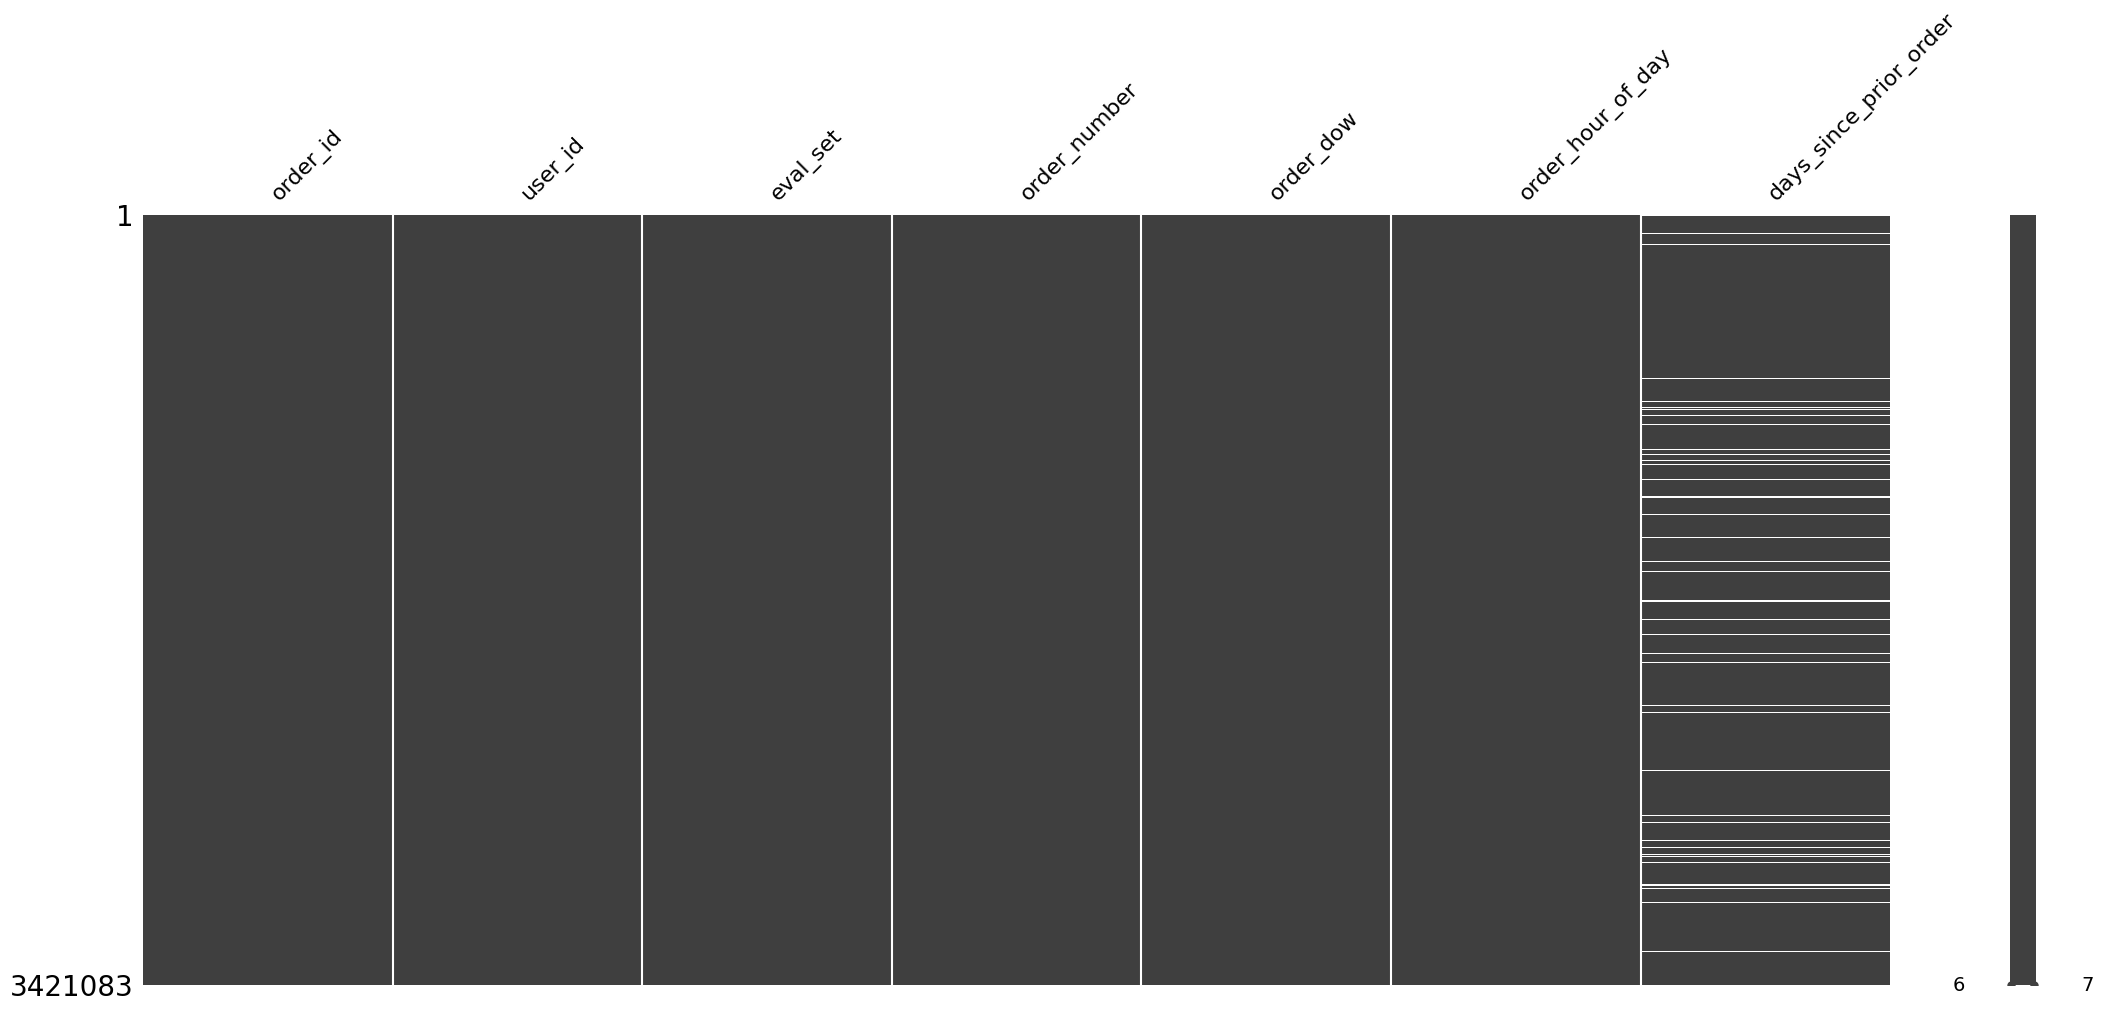

In [7]:
msno.matrix(orders);

---

**Пропуски в `orders['days_since_prior_order']` распределены случайно и не носят системного характера.**

**Missing values in `orders['days_since_prior_order']` are randomly distributed and not systematic.**

---


In [8]:
orders['eval_set']= pd.Categorical(orders['eval_set'])
orders['days_since_prior_order']= orders['days_since_prior_order'].fillna(0)

display(orders.info())
print('\n')
display(orders.head(3))
print('\n')
print('Missing values:')
display(orders.isna().sum())
print('\n')
print('Duplicates:')
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                category
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
dtypes: category(1), float64(1), int64(5)
memory usage: 159.9 MB


None

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0




Missing values:


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64



Duplicates:


0

---

In [9]:
products['product_name']= pd.Categorical(products['product_name'])
products['product_name'] = products['product_name'].apply(
    lambda x: x.encode('ascii', 'ignore').decode('utf-8') if isinstance(x, str) else x
)

display(products.info())
print('\n')
display(products.head(3))
print('\n')
print('Missing values:')
display(products.isna().sum())
print('\n')
print('Duplicates:')
display(products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7




Missing values:


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



Duplicates:


0

---

**Русский**
Датасет изначально был подготовлен достаточно хорошо. Основные подготовительные работы:

* Перевод подходящих колонок в категориальный тип для экономии памяти (full\_df уменьшился с 3.8 ГБ до 3.0 ГБ).
* Заполнение пропусков в *days\_since\_prior\_order* нулями, поскольку это не ошибка данных, а отражение первых заказов клиентов.
* Проверка на аномалии в колонках, связанных с временем, днями и флагом *reordered* — они не были обнаружены.

**English**
The dataset was initially well-prepared. Key preprocessing steps:

* Converted appropriate columns to categorical type to save memory (full\_df reduced from 3.8 GB to 3.0 GB).
* Filled missing values in *days\_since\_prior\_order* with zeros, as these represent customers’ first orders rather than data errors.
* Checked for anomalies in time-related columns, days, and the *reordered* flag — none were found.

---

# <span style="color:transparent;">3. Combining Datasets for Analysis</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Combining Datasets for Analysis
    </div>
</div>

In [10]:
order_products = pd.concat([order_products__prior, order_products__train], axis=0)



orders_partition = pd.merge(order_products, orders, how= 'inner', on= 'order_id')

In [11]:
intermediate_df = pd.merge(products, aisles, how= 'left', on= 'aisle_id')



products_df = pd.merge(intermediate_df, departments, how= 'left', on= 'department_id')

In [12]:
full_df = pd.merge(products_df, orders_partition, how= 'right', on= 'product_id')

full_df = full_df.sort_values(by= 'order_id', ignore_index=True)[["user_id", "order_id", "eval_set", "order_number", 
                                                                  "order_dow", "order_hour_of_day",
                                                                  "days_since_prior_order", "add_to_cart_order", "reordered",
                                                                  "product_id", "product_name", "aisle_id", "aisle", 
                                                                  "department_id", "department"]]

In [13]:
full_df.head(3)

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_id,product_name,aisle_id,aisle,department_id,department
0,112108,1,train,4,4,10,9.0,1,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,112108,1,train,4,4,10,9.0,3,0,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
2,112108,1,train,4,4,10,9.0,4,0,49683,Cucumber Kirby,83,fresh vegetables,4,produce


In [14]:
print(full_df.info(), end='\n\n')

print(f'Missing Values:\n{full_df.isna().sum()}') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   order_id                int64   
 2   eval_set                category
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_id              int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  aisle                   category
 13  department_id           int64   
 14  department              category
dtypes: category(3), float64(1), int64(10), object(1)
memory usage: 3.1+ GB
None

Missing Values:
user_id                   0
order_id                  0
eval_set                  0
order_number              0
order_dow                 0
o

---

**После объединения таблиц проведена проверка: корректность объединения, отсутствие пропусков и артефактов. Итоговый датафрейм готов к анализу.**

**After merging tables, we checked for correct joins, absence of missing values, and artifacts. The final dataframe is ready for analysis.**

---

# <span style="color:transparent;">4. Exploring the Data Through Visualizations</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Exploring the Data Through Visualizations
    </div>
</div>

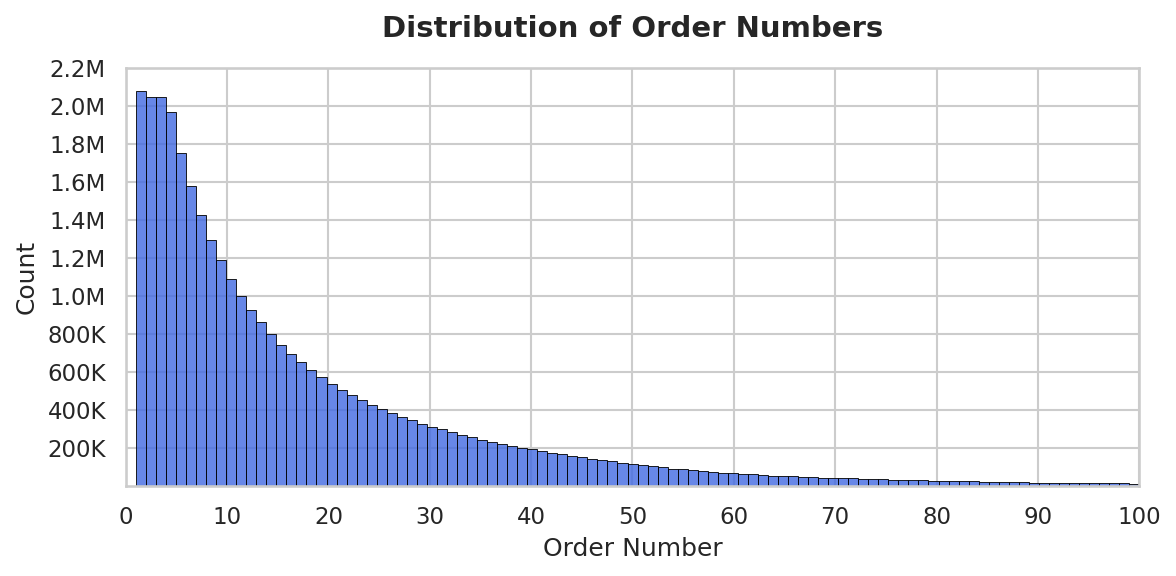

In [15]:
sns.set(style='whitegrid')

def format_yticks(x, pos):
    if x < 1_000_000:
        return f'{int(x/1_000)}K'
    else:
        return f'{x/1_000_000:.1f}M'

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)


sns.histplot(full_df['order_number'], bins=100, ax=ax, color= 'royalblue', edgecolor= 'black', alpha= 0.8)


yticks = [200_000, 400_000, 600_000, 800_000, 1_000_000, 1_200_000, 1_400_000, 1_600_000, 1_800_000, 2_000_000, 2_200_000]
ax.set_yticks(yticks)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_yticks))
plt.xticks(np.arange(0, 101, 10))

plt.title('Distribution of Order Numbers', pad= 15, fontsize= 14, fontweight= 'bold')
plt.xlabel('Order Number', fontsize= 12)
plt.xlim(0, 100)

plt.tight_layout();

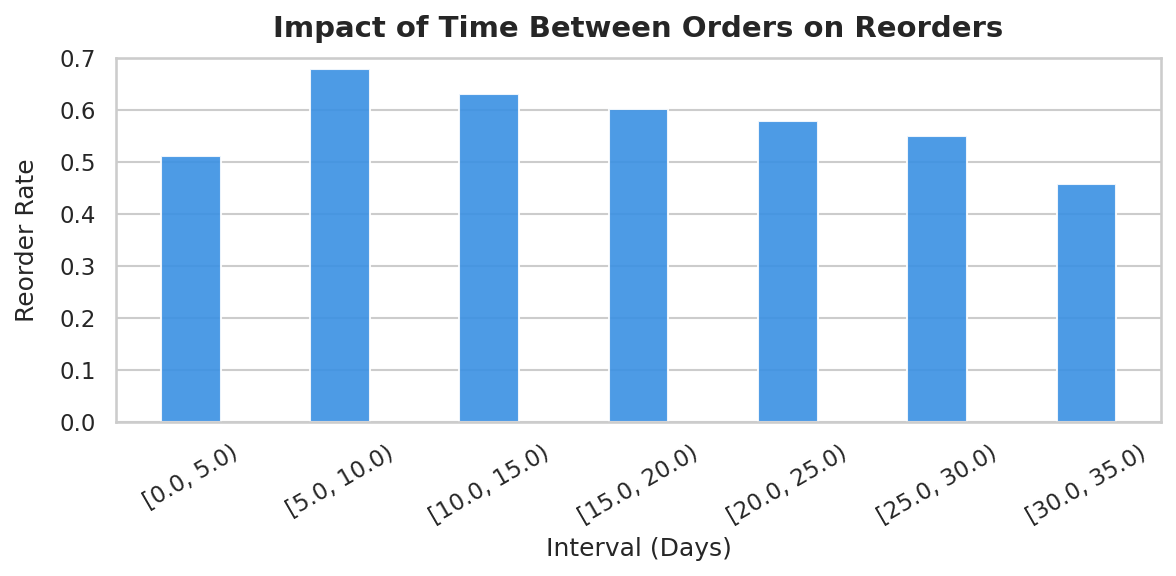

In [16]:
bins = np.arange(0, full_df['days_since_prior_order'].max() + 6, 5) 
full_df['days_bin'] = pd.cut(full_df['days_since_prior_order'], bins=bins, right=False)

reorder_rate = full_df.groupby('days_bin', observed=False)['reordered'].mean().reset_index()

plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(data=reorder_rate, x='days_bin', y='reordered', width=0.4, color='dodgerblue', alpha=0.9)
plt.xticks(rotation=30)
plt.ylim(0, 0.7)
plt.ylabel('Reorder Rate', labelpad=10)
plt.xlabel('Interval (Days)')
plt.title('Impact of Time Between Orders on Reorders', pad=10, fontsize=14, fontweight='bold')
plt.tight_layout();

plt.show;

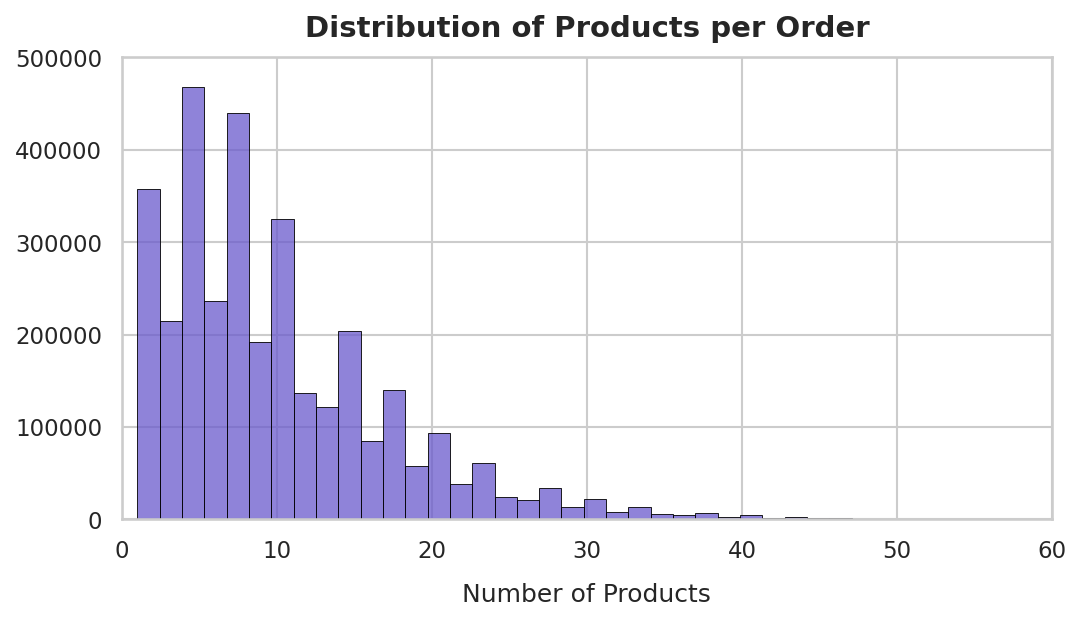

In [17]:
items_per_order= full_df.groupby('order_id').size()

fig, ax = plt.subplots(figsize= (8, 4), dpi= 150)

sns.histplot(items_per_order, bins=100, ax= ax, color= 'slateblue', edgecolor= 'black')
plt.xlim(0, 60)
plt.ylim(0, 500000)
plt.xticks(np.arange(0, 61, 10))

plt.xlabel('Number of Products', labelpad= 10)
plt.ylabel('', labelpad= 10)
plt.title('Distribution of Products per Order', pad= 10, fontsize= 14, fontweight= 'bold')

plt.tight_layout;

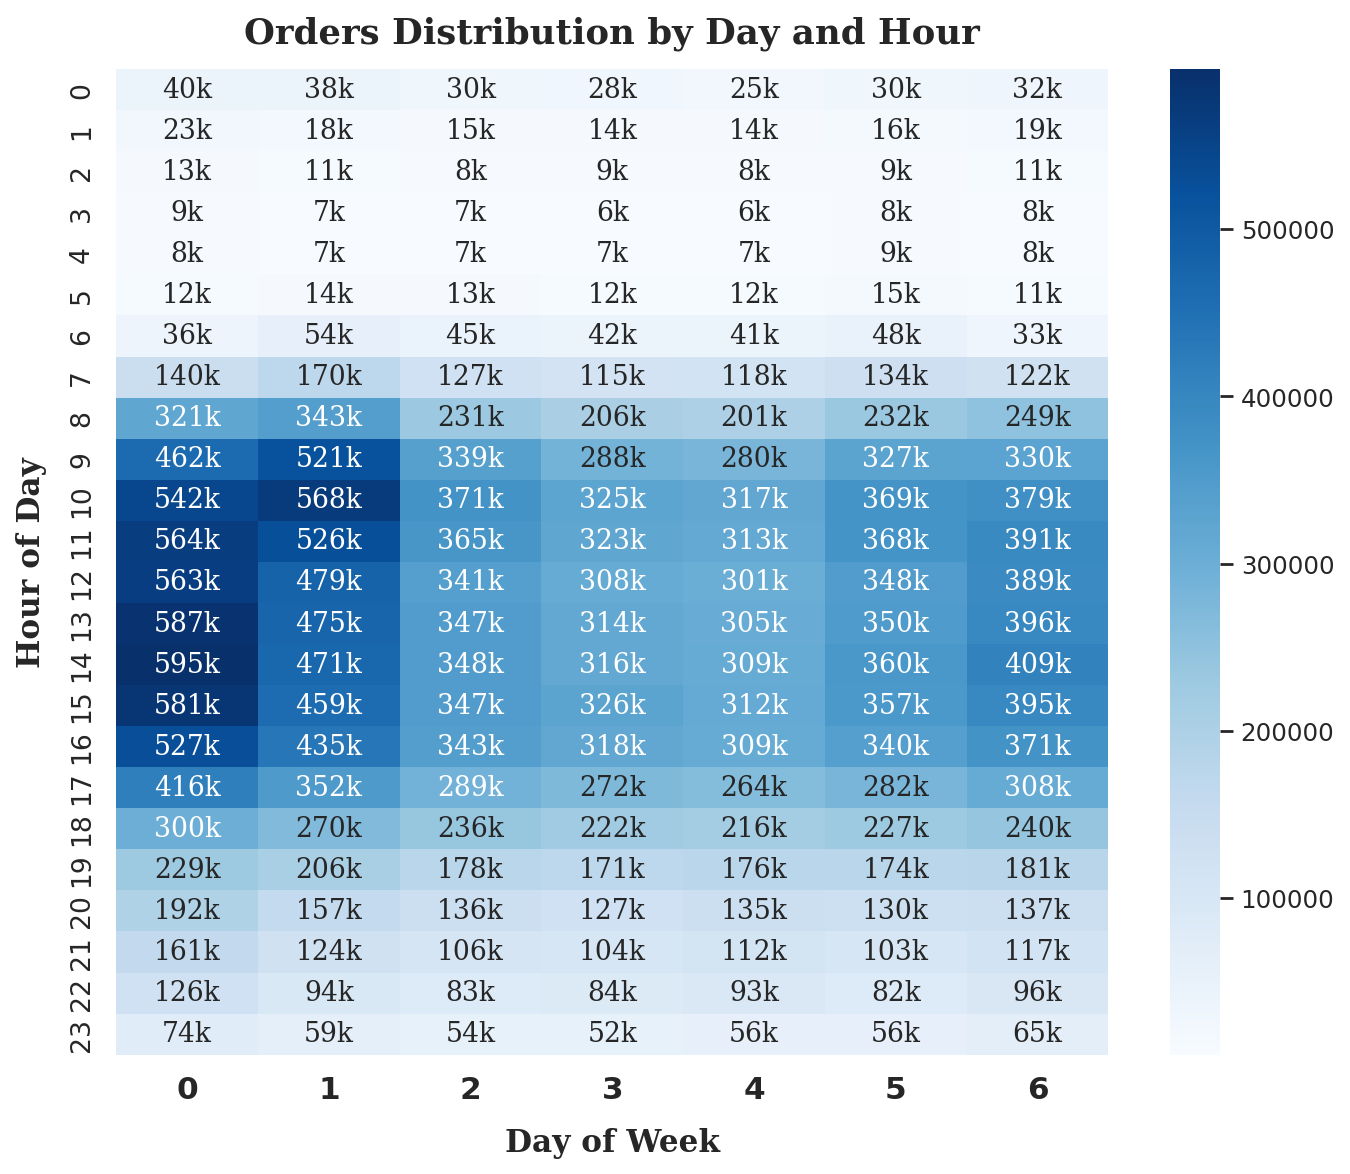

In [18]:
matrix= full_df.pivot_table(values= 'order_id', index= 'order_hour_of_day', columns= 'order_dow', aggfunc= 'count')

def k_format(x):
    return f'{int(x/1000)}k'

annot = np.vectorize(k_format)(matrix.values)

fig, ax = plt.subplots(figsize= (10, 8), dpi= 160)

sns.heatmap(matrix, ax= ax, cmap= 'Blues', annot= annot, fmt='', 
    cbar_kws={'format': '%.0f'}, annot_kws={'fontsize': 12, 'fontfamily': 'serif'}) 

plt.title('Orders Distribution by Day and Hour', pad= 12, fontsize= 16, fontweight= 'bold', fontfamily= 'serif')
plt.xlabel('Day of Week', labelpad= 10, fontsize= 14, fontweight= 'bold', fontfamily= 'serif')
plt.ylabel('Hour of Day', labelpad= 10, fontsize= 14, fontweight= 'bold', fontfamily= 'serif')
plt.xticks(fontsize=14, fontweight= 'bold')
plt.yticks(fontsize=12)

plt.tight_layout
plt.show;

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">   
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Выводы по распределению заказов по времени</h3>
    <ol>
        <li><b>Часы пик:</b> 8–16 часов, пик в 10–14.</li>
        <li><b>Утро:</b> 7–9 часов очень активные заказы.</li>
        <li><b>Вечер:</b> 17–20 часов в 2 раза слабее дневного пика.</li>
        <li><b>Ночь:</b> 0–5 часов — минимальная активность.</li>
        <li><b>День недели:</b> максимум заказов в воскресенье (0), понедельник (1), и субботу (6).</li>
    </ol>
    <p><b>Вывод:</b> маркетинг лучше запускать в «золотые часы» 9–14 и подстраиваться под выходные.</p>    
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Findings: Orders distribution by time</h3>
    <ol>
        <li><b>Peak hours:</b> 8 AM – 4 PM, with strongest activity at 10–2 PM.</li>
        <li><b>Morning:</b> 7–9 AM is also strong.</li>
        <li><b>Evening:</b> 5–8 PM shows about half the volume of midday.</li>
        <li><b>Nighttime:</b> 12–5 AM almost no activity.</li>
        <li><b>Day of week:</b> busiest are Sunday (0), Monday (1), and Saturday (6).</li>
    </ol>
    <p><b>Conclusion:</b> marketing campaigns should target golden hours (9 AM – 2 PM) and weekends with highest order volumes.</p>

</div>


In [19]:
top_15_aisles= full_df['aisle'].value_counts().head(15).sort_values(ascending= True)

top_15_departments= full_df['department'].value_counts().head(15).sort_values(ascending= True)

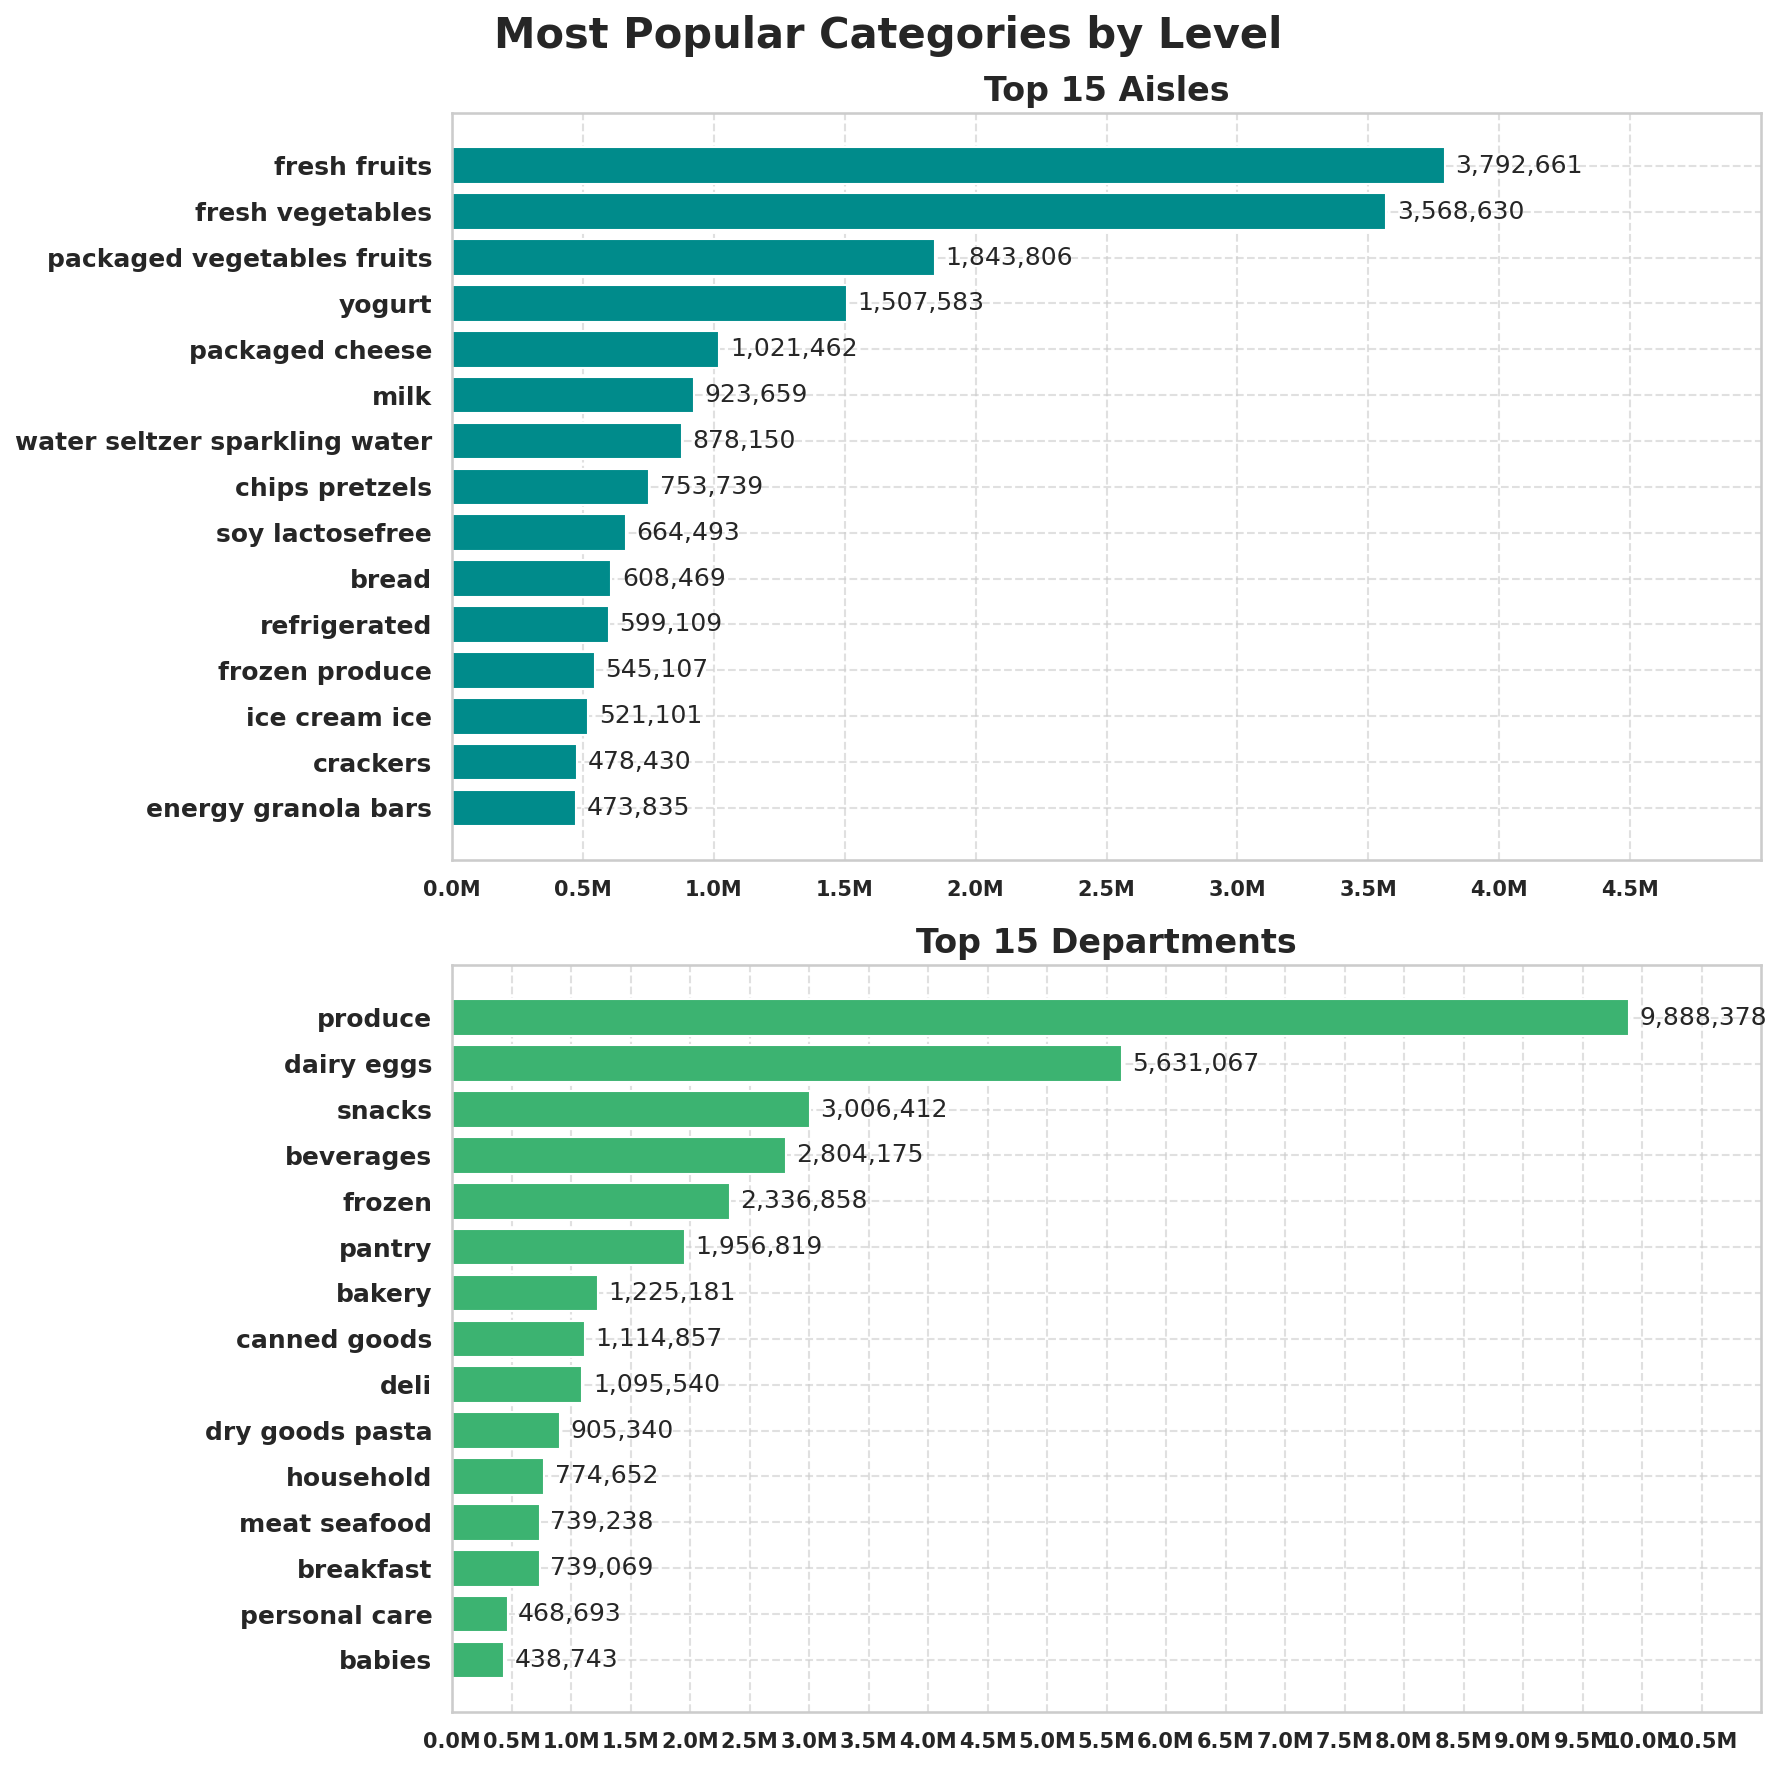

In [20]:
fig, ax= plt.subplots(figsize= (12,12), dpi= 150, nrows= 2, ncols= 1)

ax[0].barh(top_15_aisles.index, top_15_aisles.values, color= 'darkcyan')
ax[1].barh(top_15_departments.index, top_15_departments.values, color= 'mediumseagreen')

def millions(x, pos):
    return f'{x*1e-6:.1f}M'
    
formatter = mticker.FuncFormatter(millions)


for a in ax:
    a.grid(True, linestyle='--', alpha=0.6)
    a.tick_params(axis='y', labelsize=12)
    for label in a.get_yticklabels():
        label.set_fontweight('bold')
    for label in a.get_xticklabels():
        label.set_fontweight('bold')

x_ticks_0 = np.arange(0, 5_000_000, 500_000) 

ax[0].set_xlim(0, 5_000_000)
ax[0].set_xticks(x_ticks_0)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].bar_label(ax[0].containers[0], fmt='{:,.0f}', padding=5)  
ax[0].xaxis.set_major_formatter(formatter)


x_ticks_1 = np.arange(0, 11_000_000, 500_000)  

ax[1].set_xlim(0, 11_000_000)
ax[1].set_xticks(x_ticks_1)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].bar_label(ax[1].containers[0], fmt='{:,.0f}', padding=5) 
ax[1].xaxis.set_major_formatter(formatter)


fig.suptitle('Most Popular Categories by Level', fontsize= 20, fontweight= 'bold')
ax[0].set_title('Top 15 Aisles', fontsize= 16, fontweight= 'bold')
ax[1].set_title('Top 15 Departments', fontsize= 16, fontweight= 'bold')

plt.tight_layout();

In [21]:
df_reordered_rate= full_df.groupby('product_name', observed= False).agg(support= ('product_name', 'size'),
                                   reorders= ('reordered', 'sum')).reset_index()

df_reordered_rate['reordered_rate']= np.where(df_reordered_rate['reorders'] > 0, 
                                              round(df_reordered_rate['reorders'] / df_reordered_rate['support'], 3),
                                              0)


In [22]:
top_20 = df_reordered_rate[df_reordered_rate['support']>=1000].sort_values(by= 'reordered_rate', ascending= False).head(20)


top_20['product_name'] = top_20['product_name'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

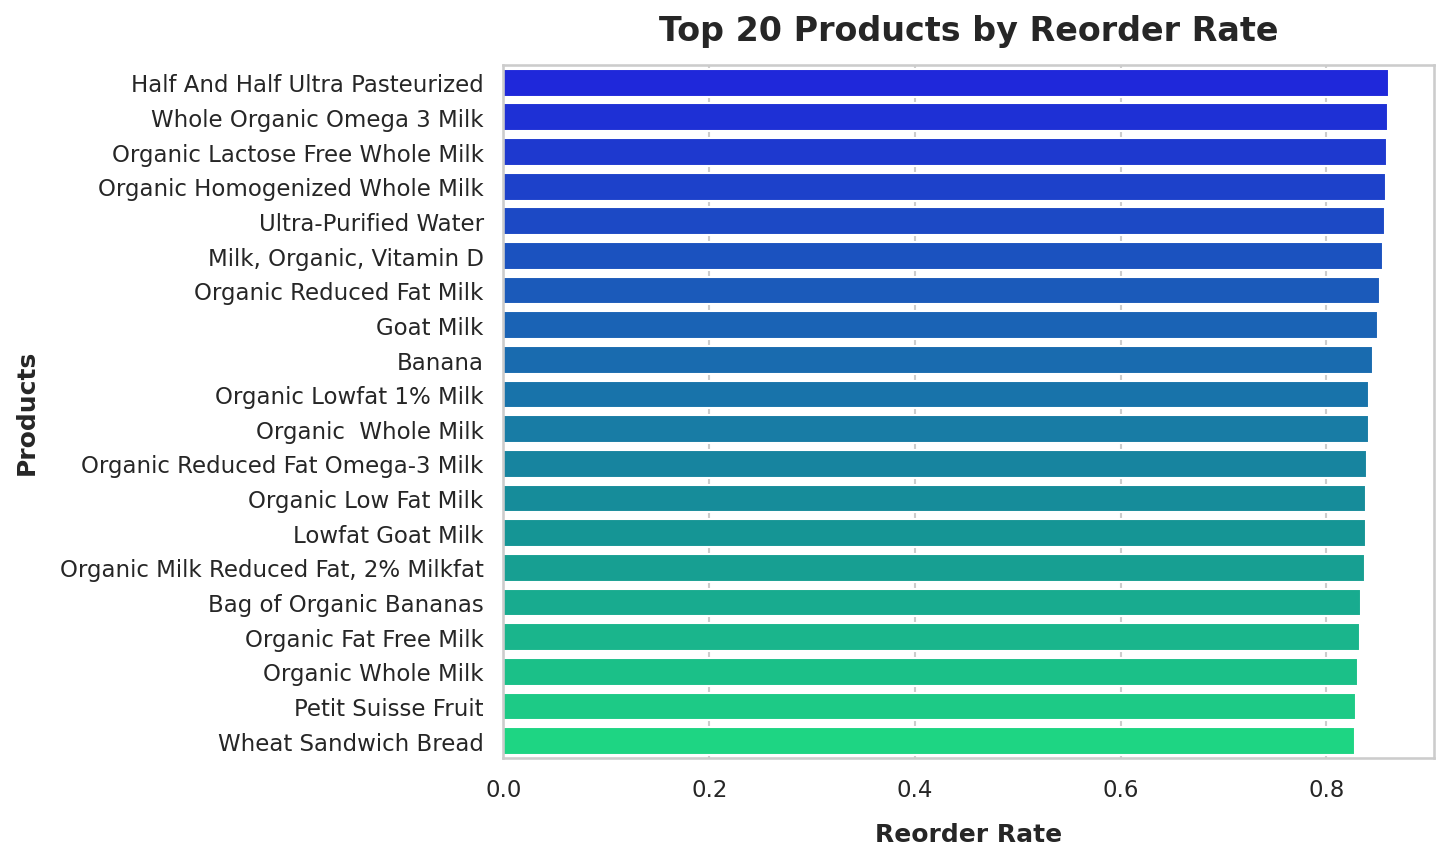

In [23]:
fig, ax = plt.subplots(figsize= (8,6), dpi= 150)

sns.barplot(data= top_20, x= 'reordered_rate', y= 'product_name', ax= ax, palette= 'winter')

plt.title('Top 20 Products by Reorder Rate', fontweight= 'bold', fontsize= 16, pad= 12)
plt.xlabel('Reorder Rate', fontweight= 'bold', fontsize= 12, labelpad= 10)
plt.ylabel('Products', fontweight= 'bold', fontsize= 12, labelpad= 10);

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">  
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Анализ распределения add_to_cart_order и зависимости reordered от позиции</h3>
    <p>Логика: посмотрим, как часто продукт повторно заказывают в зависимости от того, на каком месте он был добавлен в корзину (раньше или позже). Важно построить распределение позиций и понять, есть ли тренд — например, первые товары в корзине чаще повторяются.</p>   
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Analysis of add_to_cart_order distribution and reordered vs. cart position</h3>
    <p>Logic: we analyze how often a product is reordered depending on its position in the cart (added earlier vs. later). The key is to examine the distribution of positions and detect potential trends — for instance, whether products added earlier in the cart are more likely to be reordered.</p>

</div>


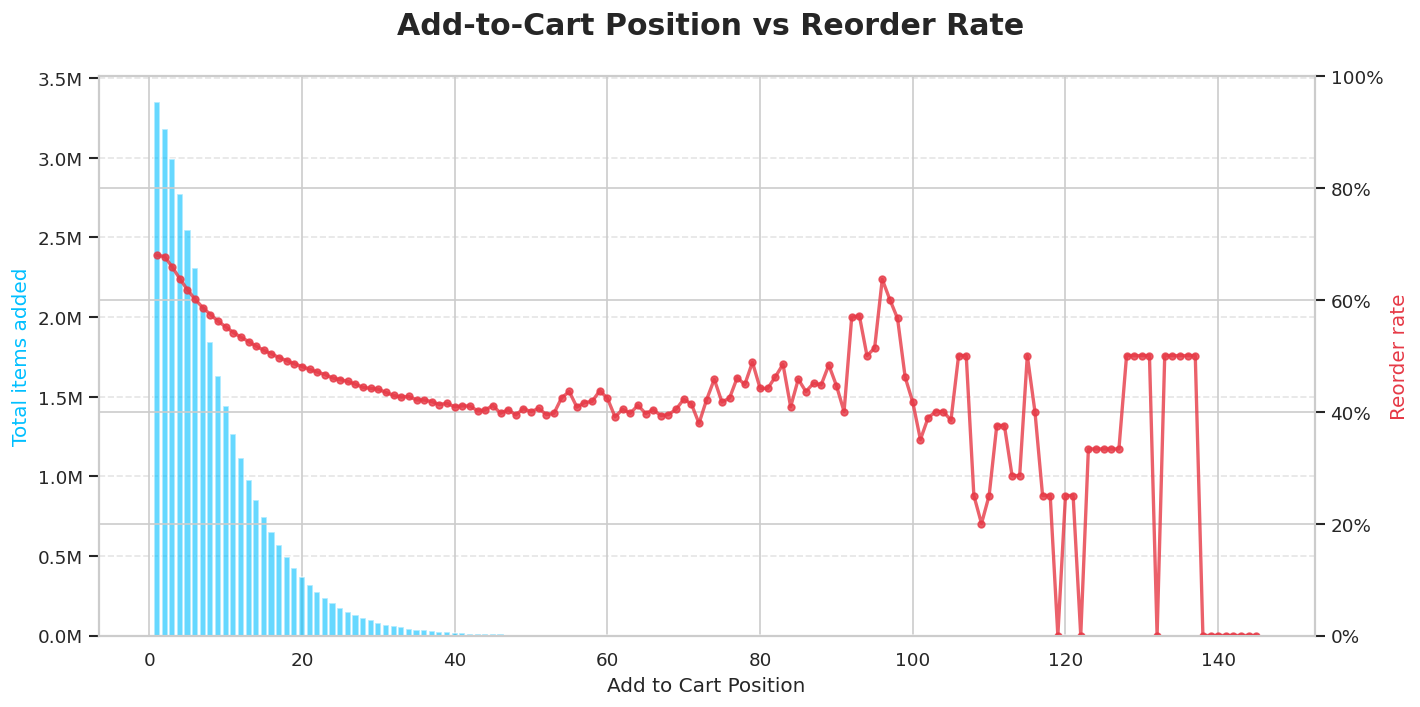

In [24]:
pos_stats = (
    full_df.groupby('add_to_cart_order', observed=False)
    .agg(total=('reordered', 'size'),
         reorders=('reordered', 'sum'))
)
pos_stats['reorder_rate'] = pos_stats['reorders'] / pos_stats['total']

fig, ax1 = plt.subplots(figsize=(12, 6), dpi=120)

ax1.bar(pos_stats.index,
        pos_stats['total'],
        color='deepskyblue',
        alpha=0.6,
        label='Total Adds (Millions)')
ax1.set_xlabel('Add to Cart Position')
ax1.set_ylabel('Total items added', color='deepskyblue')

ax1.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

ax2 = ax1.twinx()
ax2.plot(pos_stats.index,
         pos_stats['reorder_rate'],
         color='#e63946',  alpha= 0.8,
         marker='o',
         markersize=4, 
         linewidth=2,
         label='Reorder rate')
ax2.set_ylabel('Reorder rate', color='#e63946')
ax2.set_ylim(0, 1)

fig.suptitle('Add-to-Cart Position vs Reorder Rate', fontsize= 18, fontweight= 'bold')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))

plt.tight_layout();

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Выводы по гипотезе (reorder vs cart order)</h3>
    <ol>
        <li><b>Гипотеза:</b> ранние позиции → важнее → чаще повторяются.</li>
        <li><b>График:</b> первые позиции дают пик добавлений, reorder rate ~20–25%, затем спад.</li>
        <li>После позиции ~40 данные шумные, доверия мало.</li>
    </ol>
    <p><b>Вывод:</b> гипотеза подтверждается: базовые товары добавляют первыми.</p>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Findings (Reorder vs Cart Position)</h3>
    <ol>
        <li><b>Hypothesis:</b> early items → more important → higher reorder.</li>
        <li><b>Chart:</b> positions 1–3 dominate, reorder ~20–25%, then gradual decline.</li>
        <li>After ~40, data too sparse/noisy.</li>
    </ol>
    <p><b>Conclusion:</b> hypothesis holds — essentials go first, noisy tail ignored.</p>

</div>


# <span style="color:transparent;">5. Key Product Metrics and Insights</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Key Product Metrics and Insights
    </div>
</div>

In [25]:
aisle_stats= full_df.groupby('aisle', observed=False).agg(mean_ord= ('add_to_cart_order', 'mean'),
                            median_ord= ('add_to_cart_order', 'median'),
                            first_add_rate= ('add_to_cart_order', lambda x: (x==1).mean()))


print("Top 10 aisles with the lowest average cart position (added earliest)")
display(aisle_stats['mean_ord'].sort_values().head(10))
print()
print("Top 10 aisles with the lowest median cart position (added earliest)")
display(aisle_stats['median_ord'].sort_values().head(10))
print()
print("Top 10 aisles by first-add rate (most often the first item)")
display(aisle_stats['first_add_rate'].sort_values(ascending= False).head(10))

Top 10 aisles with the lowest average cart position (added earliest)


aisle
spirits                          4.853349
packaged produce                 5.141712
specialty wines champagnes       5.213740
beers coolers                    5.352127
milk                             5.576440
white wines                      5.598464
red wines                        5.947095
water seltzer sparkling water    6.086957
eggs                             6.435782
soft drinks                      6.469137
Name: mean_ord, dtype: float64


Top 10 aisles with the lowest median cart position (added earliest)


aisle
beers coolers                    3.0
spirits                          3.0
specialty wines champagnes       3.0
packaged produce                 4.0
water seltzer sparkling water    4.0
white wines                      4.0
milk                             4.0
red wines                        4.0
soft drinks                      4.0
cat food care                    5.0
Name: median_ord, dtype: float64


Top 10 aisles by first-add rate (most often the first item)


aisle
spirits                          0.297946
specialty wines champagnes       0.273180
beers coolers                    0.218235
milk                             0.212861
white wines                      0.212476
water seltzer sparkling water    0.191414
packaged produce                 0.184422
red wines                        0.179222
soft drinks                      0.173791
cold flu allergy                 0.165505
Name: first_add_rate, dtype: float64

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <!-- TEXT 4 -->
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Выводы по позициям (add_to_cart_order)</h3>
    <ul>
        <li>Алкогольные напитки — чаще всего первые (30%).</li>
        <li>Молочные и вода тоже ранние.</li>
        <li>Фрукты/овощи упакованные и газировка чуть позже.</li>
        <li>Медиана: алкоголь ~3, молоко/яйца ~4–6.</li>
        <li>Категория лекарств неожиданно в топе по «первым добавлениям».</li>
    </ul>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Cart Position Insights</h3>
    <ul>
        <li>Alcoholic drinks often come first (~30%).</li>
        <li>Milk and water also early.</li>
        <li>Packaged produce & soda slightly later.</li>
        <li>Medians: alcohol ~3, milk/eggs ~4–6.</li>
        <li>Medicine category surprisingly appears in top picks.</li>
    </ul>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>


In [26]:
total_orders = full_df['order_id'].nunique()

penetration = (
    full_df.groupby('aisle', observed=False)['order_id']
    .nunique()  
    .sort_values(ascending=False)
    / total_orders
)


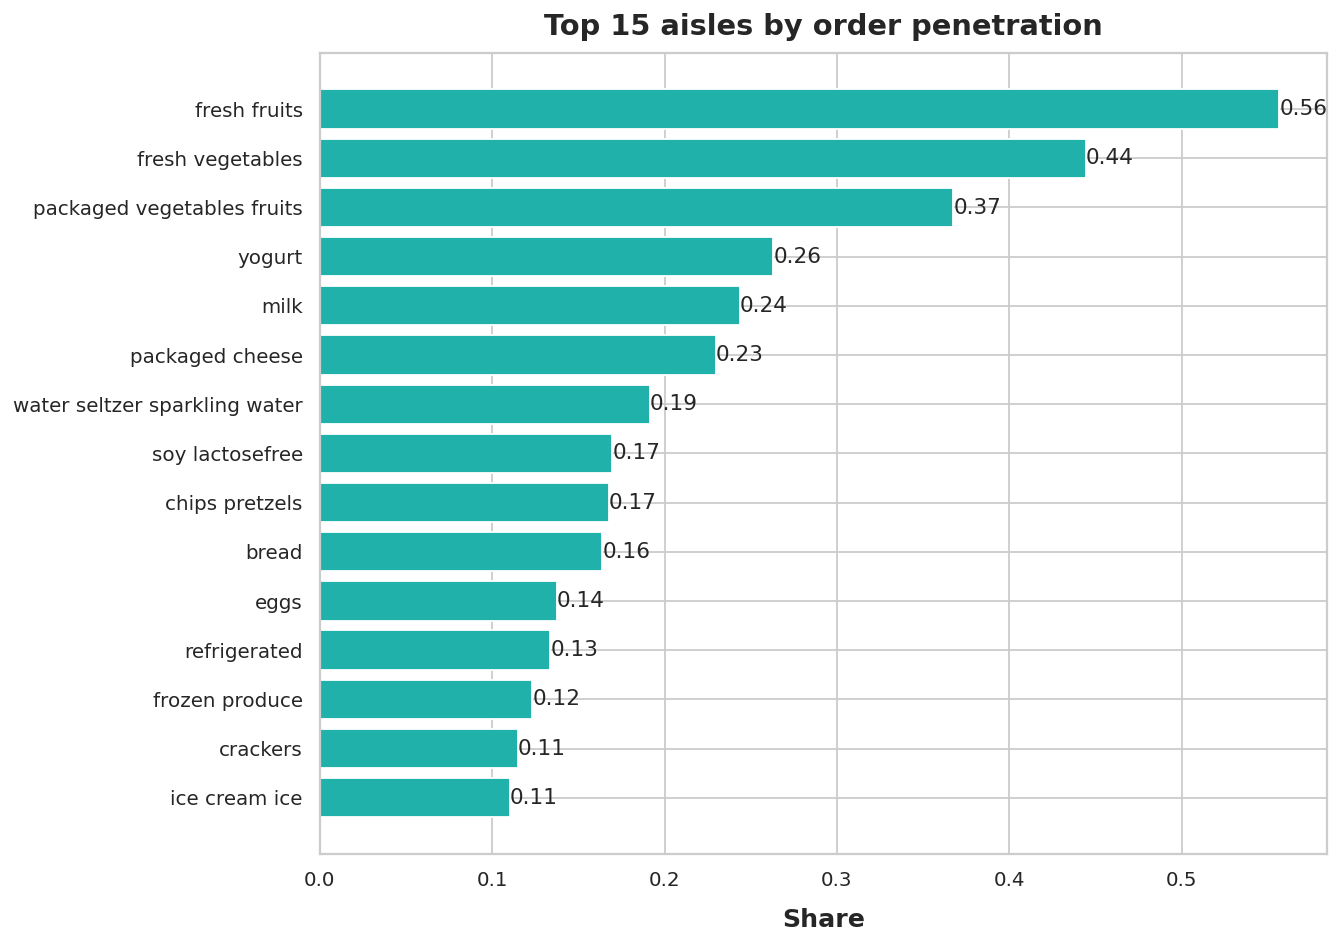

In [27]:
pen= penetration.head(15).sort_values()

fig, ax= plt.subplots(figsize= (10, 8), dpi= 130)

ax.barh(pen.index, pen.values, color= 'lightseagreen')

plt.title('Top 15 aisles by order penetration', pad= 10, fontsize= 16, fontweight= 'bold')
plt.xlabel('Share', labelpad= 10, fontsize= 14, fontweight= 'bold')

ax.bar_label(ax.containers[0], fmt='%.2f');

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <!-- TEXT 3 -->
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Выводы по данным (категории)</h3>
    <ul>
        <li><b>Фреш лидирует:</b> фрукты 55.7%, овощи 44.4%.</li>
        <li>Молочка и упакованные продукты также ядро заказов.</li>
        <li>Вода и безлактозные ~17–19%.</li>
        <li>Снеки и хлеб ~11–17%.</li>
        <li>Яйца и заморозка ~12–13%.</li>
        <li>Мороженое 11% — скорее баловство.</li>
    </ul>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Data Findings (Categories)</h3>
    <ul>
        <li><b>Fresh dominates:</b> fruits 55.7%, vegetables 44.4%.</li>
        <li>Dairy + packaged produce also strong.</li>
        <li>Water & lactose-free ~17–19%.</li>
        <li>Snacks/bread ~11–17%.</li>
        <li>Eggs & frozen ~12–13%.</li>
        <li>Ice cream ~11% — treat, not staple.</li>
    </ul>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>


# <span style="color:transparent;">6. Cohort Analysis: Tracking Customer Behavior Over Time</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Cohort Analysis: Tracking Customer Behavior Over Time
    </div>
</div>

In [28]:
orders['cohort_order'] = 1  

cohort_data = (
    orders.groupby(['cohort_order','order_number'])
    .agg(users=('user_id','nunique'))
    .reset_index()
)

cohort_data['cohort_size'] = cohort_data['users'].max()
cohort_data['retention'] = cohort_data['users'] / cohort_data['cohort_size']


retention_matrix = cohort_data.pivot(index='cohort_order', columns='order_number', values='retention')

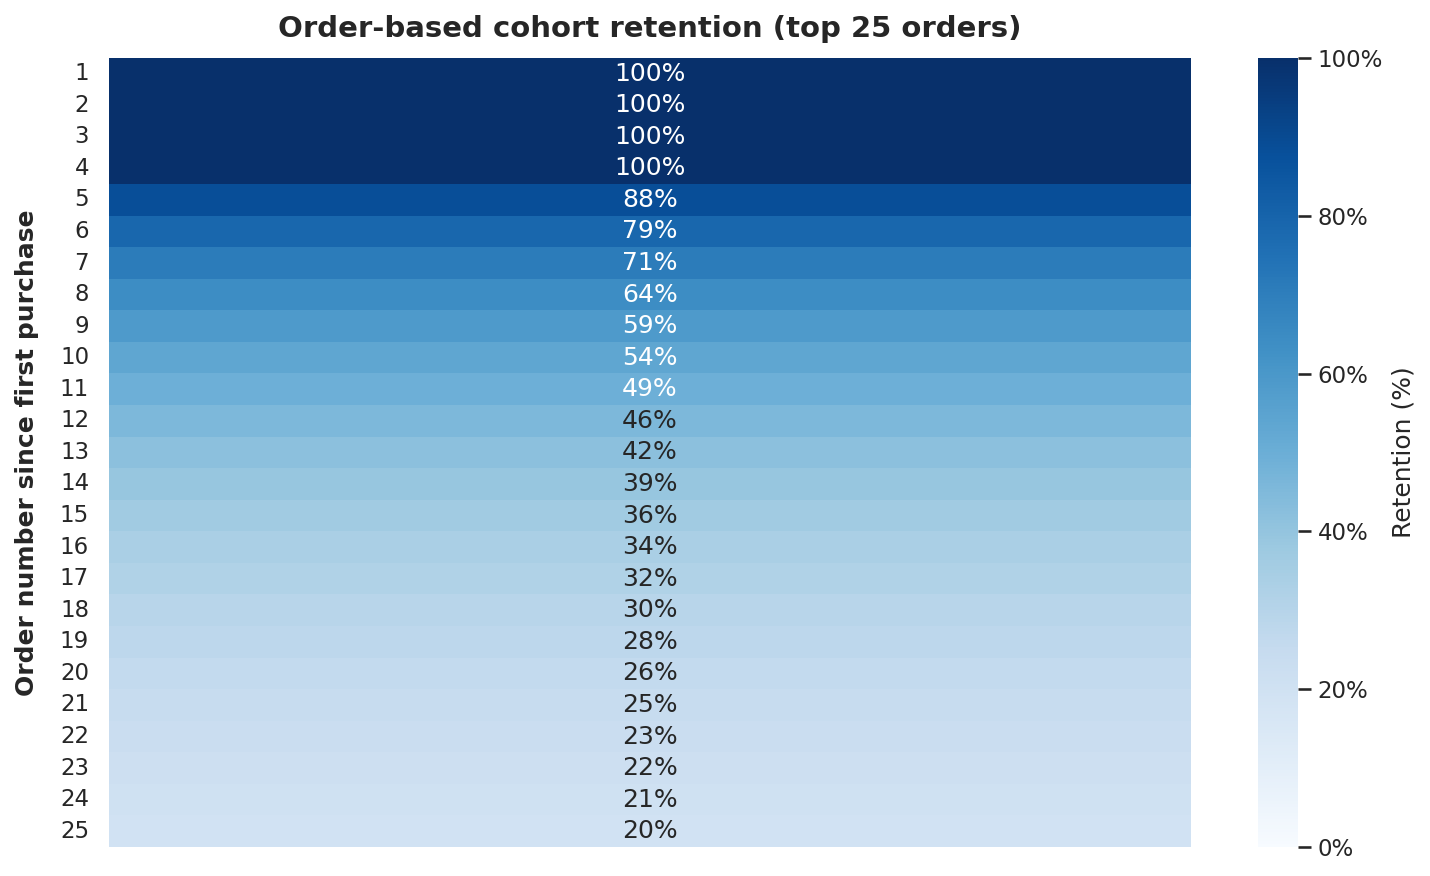

In [29]:
retention_top25 = retention_matrix.T.head(25)

plt.figure(figsize=(10, 6), dpi= 150)
annot = retention_top25.map(lambda x: f"{x:.0%}")

ax = sns.heatmap(retention_top25, annot=annot, fmt='', cmap='Blues', cbar_kws={'label':'Retention (%)'}, vmin=0, vmax=1)
ax.axes.xaxis.set_visible(False)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])


plt.title('Order-based cohort retention (top 25 orders)', fontsize= 14, fontweight= 'bold', pad= 10)
plt.xlabel('Cohort', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.ylabel('Order number since first purchase', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.yticks(rotation=0)
plt.tight_layout()

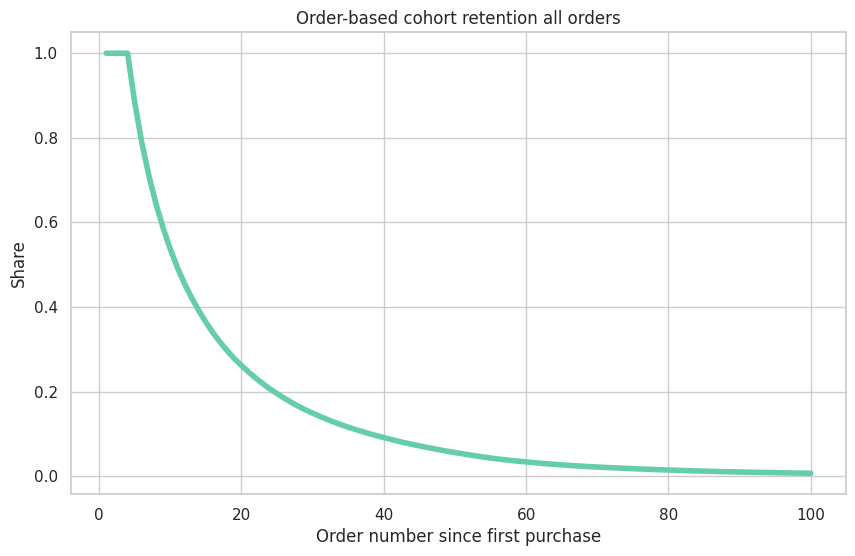

In [30]:
retention_matrix.T.plot(figsize=(10,6), title='Order-based cohort retention all orders',
                     xlabel='Order number since first purchase',
                     ylabel='Share', legend=False, color= 'mediumaquamarine', linewidth=4);

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <!-- TEXT 2 -->
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Retention-анализ</h3>
    <ul>
        <li><b>Быстрое снижение:</b> к 5-му заказу остаётся 88% пользователей.</li>
        <li><b>Постепенный спад:</b> к 25-му заказу удержание падает до 20%.</li>
        <li>Большинство делают 5–10 заказов, затем снижается вовлечённость.</li>
    </ul>
    <p><b>Практика:</b> фокус на удержание первых 5–10 заказов.</p>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Retention Analysis</h3>
    <ul>
        <li><b>Rapid drop:</b> by the 5th order, 88% remain.</li>
        <li><b>Gradual decline:</b> by the 25th order, only 20% remain.</li>
        <li>Most users churn after 5–10 orders.</li>
    </ul>
    <p><b>Takeaway:</b> critical retention window = first 5–10 orders.</p>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>


# <span style="color:transparent;">7. RFM Analysis: Segmenting Customers by Value</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        RFM Analysis: Segmenting Customers by Value
    </div>
</div>

In [31]:
orders['days_since_first_order']= orders.groupby('user_id')['days_since_prior_order'].cumsum()

In [32]:
segment_map = {
    (5,1): "About to Sleep",  (5,2): "Loyal",              (5,3): "Potential Loyalist", (5,4): "Potential Loyalist", (5,5): "Champions",
    (4,1): "Hibernating",     (4,2): "About to Sleep",     (4,3): "Potential Loyalist", (4,4): "Loyal",              (4,5): "Champions",
    (3,1): "Hibernating",     (3,2): "About to Sleep",     (3,3): "At Risk",            (3,4): "Loyal",              (3,5): "Champions",
    (2,1): "Hibernating",     (2,2): "Hibernating",        (2,3): "At Risk",            (2,4): "At Risk",            (2,5): "Loyal",
    (1,1): "Hibernating",     (1,2): "Hibernating",        (1,3): "At Risk",            (1,4): "At Risk",            (1,5): "Loyal"
}


In [33]:
rf = orders.groupby('user_id').agg(
    max_order=('order_number','max'),
    recency=('days_since_first_order','max')
).reset_index()

rf['frequency'] = rf['max_order']

rf = rf[['user_id','recency','frequency']]


rf['R_score'] = pd.qcut(rf['recency'], 5, labels=[5,4,3,2,1])  
rf['F_score'] = pd.qcut(rf['frequency'], 5, labels=[1,2,3,4,5]) 

rf['RF_score'] = rf['R_score'].astype(int) + rf['F_score'].astype(int)


rf['segment'] = rf.apply(
    lambda row: segment_map.get((int(row['R_score']), int(row['F_score']))),
    axis=1)

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>🗺️ Карта сегментов R-F</h3>

<table style="border-collapse: collapse; width: 100%; text-align: center; margin: 20px 0;">
    <tr>
        <th style="border: 1px solid #999; padding: 8px;">R\F</th>
        <th style="border: 1px solid #999; padding: 8px;">F=1</th>
        <th style="border: 1px solid #999; padding: 8px;">F=2</th>
        <th style="border: 1px solid #999; padding: 8px;">F=3</th>
        <th style="border: 1px solid #999; padding: 8px;">F=4</th>
        <th style="border: 1px solid #999; padding: 8px;">F=5</th>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=5</b></td>
        <td>About to Sleep</td>
        <td>Loyal</td>
        <td>Potential Loyalist</td>
        <td>Potential Loyalist</td>
        <td><b>Champions</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=4</b></td>
        <td>Hibernating</td>
        <td>About to Sleep</td>
        <td>Potential Loyalist</td>
        <td>Loyal</td>
        <td>Champions</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=3</b></td>
        <td>Hibernating</td>
        <td>About to Sleep</td>
        <td>At Risk</td>
        <td>Loyal</td>
        <td>Champions</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=2</b></td>
        <td>Hibernating</td>
        <td>Hibernating</td>
        <td>At Risk</td>
        <td>At Risk</td>
        <td>Loyal</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=1</b></td>
        <td><b>Hibernating</b></td>
        <td>Hibernating</td>
        <td>At Risk</td>
        <td>At Risk</td>
        <td>Loyal</td>
    </tr>
</table>
    <h4>🧠 Как читать:</h4>
    <ul>
        <li><b>Champions (R=5,F=5):</b> свежие и частые → 💎 твои лучшие пользователи.</li>
        <li><b>Hibernating (R=1,F=1):</b> давно не было заказов и мало → 💤 спят.</li>
        <li><b>At Risk:</b> раньше заказывали часто, но давно не появлялись → ⚠️ потеряешь, если не вернёшь.</li>
        <li><b>Loyal:</b> стабильно покупают, хоть и не всегда супер-свежо → ❤️ хорошие постоянные.</li>
        <li><b>Potential Loyalist / About to Sleep:</b> промежуточные состояния, кандидаты в лучшие или в отвал.</li>
    </ul>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>🗺️ Segment Map R-F</h3>

<table style="border-collapse: collapse; width: 100%; text-align: center; margin: 20px 0;">
    <tr>
        <th style="border: 1px solid #999; padding: 8px;">R\F</th>
        <th style="border: 1px solid #999; padding: 8px;">F=1</th>
        <th style="border: 1px solid #999; padding: 8px;">F=2</th>
        <th style="border: 1px solid #999; padding: 8px;">F=3</th>
        <th style="border: 1px solid #999; padding: 8px;">F=4</th>
        <th style="border: 1px solid #999; padding: 8px;">F=5</th>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=5</b></td>
        <td>About to Sleep</td>
        <td>Loyal</td>
        <td>Potential Loyalist</td>
        <td>Potential Loyalist</td>
        <td><b>Champions</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=4</b></td>
        <td>Hibernating</td>
        <td>About to Sleep</td>
        <td>Potential Loyalist</td>
        <td>Loyal</td>
        <td>Champions</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=3</b></td>
        <td>Hibernating</td>
        <td>About to Sleep</td>
        <td>At Risk</td>
        <td>Loyal</td>
        <td>Champions</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=2</b></td>
        <td>Hibernating</td>
        <td>Hibernating</td>
        <td>At Risk</td>
        <td>At Risk</td>
        <td>Loyal</td>
    </tr>
    <tr>
        <td style="border: 1px solid #999; padding: 8px;"><b>R=1</b></td>
        <td><b>Hibernating</b></td>
        <td>Hibernating</td>
        <td>At Risk</td>
        <td>At Risk</td>
        <td>Loyal</td>
    </tr>
</table>
    <h4>🧠 How to read:</h4>
    <ul>
        <li><b>Champions (R=5,F=5):</b> recent & frequent → 💎 your best users.</li>
        <li><b>Hibernating (R=1,F=1):</b> few orders and long ago → 💤 inactive.</li>
        <li><b>At Risk:</b> used to buy often but haven’t returned → ⚠️ risk of churn.</li>
        <li><b>Loyal:</b> steady buyers, though not always very recent → ❤️ reliable regulars.</li>
        <li><b>Potential Loyalist / About to Sleep:</b> transitional states, could become champions or churn.</li>
    </ul>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>


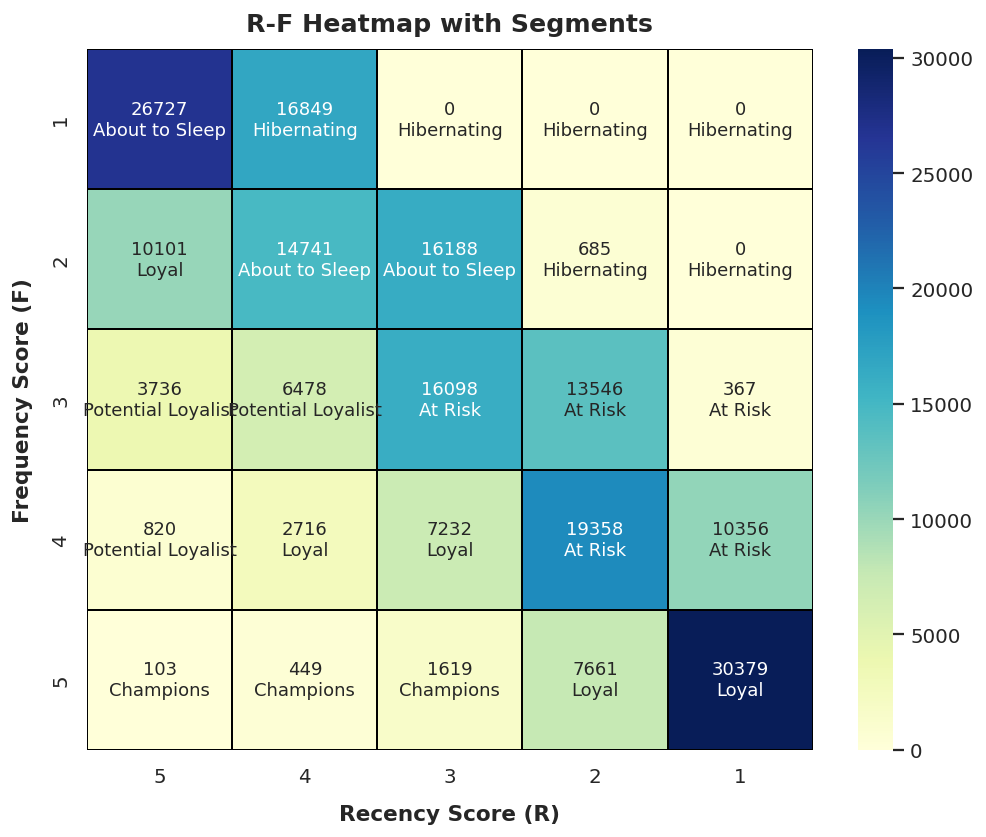

In [34]:
rf_heatmap = (
    rf.groupby(['R_score','F_score'], observed= False)
      .size()
      .reset_index(name= 'count')
      .pivot(index='F_score', columns= 'R_score', values= 'count')
)

annot_matrix = rf_heatmap.copy().astype(str)

for f in rf_heatmap.index:
    for r in rf_heatmap.columns:
        count = rf_heatmap.loc[f, r]
        segment = segment_map.get((r, f), "")
        annot_matrix.loc[f, r] = f"{count}\n{segment}"

plt.figure(figsize= (9,7), dpi= 130)
sns.heatmap(
    rf_heatmap.astype(float),  
    annot=annot_matrix,        
    fmt='', cmap= 'YlGnBu',
    cbar=True,
    linewidths=1, linecolor= 'black', 
    annot_kws={'size': 10}     
)

plt.title('R-F Heatmap with Segments', fontsize= 14, fontweight= 'bold', pad= 10)
plt.ylabel('Frequency Score (F)', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.xlabel('Recency Score (R)', fontsize= 12, fontweight= 'bold', labelpad= 10);

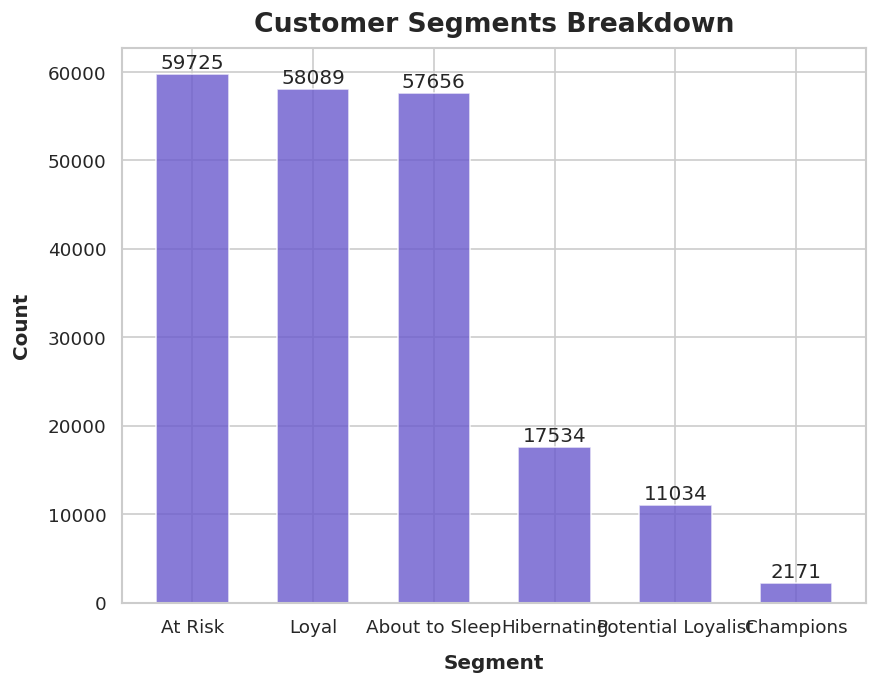

In [35]:
plt.figure(figsize=(8, 6), dpi= 120)

ax = plt.bar(rf['segment'].value_counts().index, rf['segment'].value_counts().values, width=0.6, color='slateblue', alpha=0.8)

plt.title('Customer Segments Breakdown', fontsize= 16, fontweight= 'bold', pad= 10)
plt.xlabel('Segment', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.ylabel('Count', fontsize= 12, fontweight= 'bold', labelpad= 10)

plt.bar_label(ax, padding=1);

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <!-- TEXT 1 -->
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>📝 Итоговый разбор (RF-анализ)</h3>
    <p>Мы провели RF-анализ (Recency + Frequency), без компонента Monetary, так как данных о сумме заказов нет. Даже без Monetary этот анализ позволяет сегментировать пользователей:</p>
    <ul>
        <li><b>Recency (R)</b> — как давно был последний заказ.</li>
        <li><b>Frequency (F)</b> — сколько заказов сделал пользователь.</li>
    </ul>
    <p>Это выделяет ключевые группы: «часто/редко» и «давно/недавно».</p>
    <h4>📊 Выводы по сегментам</h4>
    <ul>
        <li><b>At Risk (59 725)</b> — крупнейший сегмент, пользователи выпадали из активных → тревожный сигнал.</li>
        <li><b>Loyal (58 089)</b> — стабильные, активные покупатели.</li>
        <li><b>About to Sleep (57 656)</b> — постепенно «остывают».</li>
        <li><b>Hibernating (17 534)</b> — почти «мертвые» клиенты, малый потенциал.</li>
        <li><b>Potential Loyalist (11 034)</b> — кандидаты в Loyal, недавно активные.</li>
        <li><b>Champions (2 171)</b> — ядро: ценнейшие, часто покупающие.</li>
    </ul>
    <h4>🚀 Рекомендации (RU)</h4>
    <ol>
        <li>Сфокусироваться на At Risk.</li>
        <li>Развивать Potential Loyalist.</li>
        <li>Удерживать Champions и Loyal.</li>
        <li>Стимулировать About to Sleep мягко.</li>
        <li>Не тратить много на Hibernating.</li>
    </ol>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>📝 Final Analysis (RF)</h3>
    <p>We conducted RF analysis (Recency + Frequency) without Monetary. Even so, it provides valuable segmentation:</p>
    <ul>
        <li><b>Recency (R)</b> — how long since last order.</li>
        <li><b>Frequency (F)</b> — how many orders a user placed.</li>
    </ul>
    <h4>📊 Segment Findings</h4>
    <ul>
        <li><b>At Risk (59,725)</b> — largest segment, once active, now lapsing.</li>
        <li><b>Loyal (58,089)</b> — consistent and active customers.</li>
        <li><b>About to Sleep (57,656)</b> — gradually disengaging.</li>
        <li><b>Hibernating (17,534)</b> — low-activity, likely lost.</li>
        <li><b>Potential Loyalist (11,034)</b> — promising candidates for loyalty.</li>
        <li><b>Champions (2,171)</b> — top-tier, high-value customers.</li>
    </ul>
    <h4>🚀 Recommendations (EN)</h4>
    <ol>
        <li>Focus on At Risk.</li>
        <li>Nurture Potential Loyalists.</li>
        <li>Protect Champions and Loyal.</li>
        <li>Gently trigger About to Sleep.</li>
        <li>Limit spend on Hibernating.</li>
    </ol>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>


# <span style="color:transparent;">8. ABC-XYZ Analysis: Understanding Product Performance</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        ABC-XYZ Analysis: Understanding Product Performance 
    </div>
</div>

## <span style="color:transparent;">8.1 Aisle-Level ABC-XYZ Insights </span>

<div style="
    background: #C5E6FA;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'cursive', cursive; font-size: 42px; font-weight: normal; margin: 0;">
        Aisle-Level ABC-XYZ Insights
    </div>
</div>

In [36]:
abc_aisle= full_df.groupby('aisle', observed= False).agg(sales_volume= ('aisle', 'count'))

abc_aisle['share']= (abc_aisle['sales_volume'].div(abc_aisle['sales_volume'].sum()).mul(100))

abc_aisle.sort_values(by= 'share', ascending= False, inplace= True)

abc_aisle['cum_share']= abc_aisle['share'].cumsum()

abc_aisle.head()

,sales_volume,share,cum_share
aisle,,,
fresh fruits,3792661,11.214551,11.214551
fresh vegetables,3568630,10.552112,21.766663
packaged vegetables fruits,1843806,5.451966,27.218629
yogurt,1507583,4.457785,31.676414
packaged cheese,1021462,3.020370,34.696784


In [37]:
def abc_segmentation(s):
    '''function for segmentation ABC groups'''
    eps = 1e-6
    if 0 <= s < 80:
        return 'A'
    elif 80 <= s < 95:
        return 'B'
    elif 95 <= s <= 100 + eps :
        return 'C'
    else:
        return 'mistake'

abc_aisle['abc_segment']= abc_aisle['cum_share'].apply(abc_segmentation)

In [38]:
aisle_bin = (full_df.groupby(['days_bin', 'aisle'], observed= False).size().reset_index(name= 'sales'))

bin_totals = (full_df.groupby('days_bin', observed= False).size().reset_index(name= 'total_sales'))

aisle_bin = aisle_bin.merge(bin_totals, on= 'days_bin', how= 'left')

aisle_bin['share'] = aisle_bin['sales'] / aisle_bin['total_sales']

xyz_aisle = (aisle_bin.groupby('aisle', observed= False).agg(mean_share= ('share', 'mean'),
         std_share= ('share', 'std')).reset_index())

xyz_aisle['cv'] = xyz_aisle['std_share'] / xyz_aisle['mean_share']

In [39]:
def xyz_segmentation(s):
    '''function for segmentation XYZ groups'''
    if s <= 0.25: 
        return 'X'
    elif s <= 0.5: 
        return 'Y'
    else:
        return 'Z'

xyz_aisle['xyz_segment'] = xyz_aisle['cv'].apply(xyz_segmentation)

In [40]:
abc_xyz = abc_aisle.merge(xyz_aisle[['aisle','xyz_segment']], on='aisle')

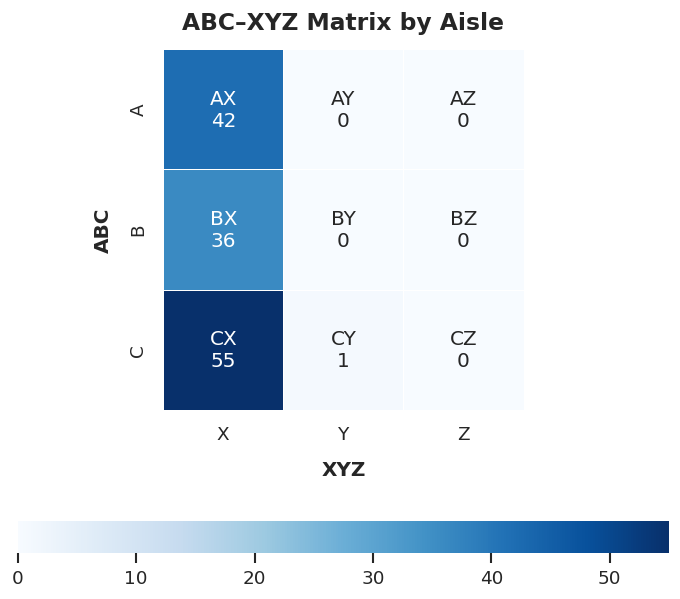

In [41]:
abc_order = ["A", "B", "C"]
xyz_order = ["X", "Y", "Z"]

matrix = abc_xyz.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value=0).reindex(index=abc_order, columns=xyz_order, fill_value=0)


plt.figure(figsize=(7, 6), dpi= 120)

labels = matrix.copy().astype(str)
for i in matrix.index:
    for j in matrix.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix.loc[i, j]}"


sns.heatmap(matrix, fmt='', cmap='Blues', annot=labels, cbar=True, linewidths=0.5, linecolor='white',
            cbar_kws= {'orientation': 'horizontal', 'pad':0.20}, square=True)
plt.title('ABC–XYZ Matrix by Aisle', fontsize= 14, fontweight= 'bold', pad= 12)
plt.ylabel('ABC', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.xlabel('XYZ', fontsize= 12, fontweight= 'bold', labelpad= 10);

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>ABC–XYZ анализ по полкам (aisle)</h3>
    <p><b>Зачем:</b> выявить вклад полок в продажи (ABC) и стабильность спроса (XYZ).</p>
    <p><b>Ограничения:</b></p>
    <ul>
        <li>В датасете нет календарной оси → пришлось использовать <code>days_since_prior_order</code>.</li>
        <li>Коэффициент вариации получился смещённым, но нормировка на долю по бинам дала более честные результаты.</li>
        <li>Итог «не классический» — почти все полки в X, что отражает специфику данных.</li>
    </ul>
    <p><b>Инсайты:</b></p>
    <ul>
        <li>Полки A и B (95% продаж) стабильно в X.</li>
        <li>Полки C также в основном стабильные, есть редкие CY.</li>
        <li>Вывод: ядро ассортимента устойчивое, редкие категории более волатильны.</li>
    </ul>
    <p><b>Следующий шаг:</b> анализ на уровне продуктов: <i>Fresh Fruits</i> и <i>Frozen Juice</i>.</p>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>ABC–XYZ Analysis (aisle-level)</h3>
    <p><b>Purpose:</b> measure aisle sales contribution (ABC) and demand stability (XYZ).</p>
    <p><b>Limitations:</b></p>
    <ul>
        <li>No calendar axis → used <code>days_since_prior_order</code> instead.</li>
        <li>Coefficient of variation skewed; normalized shares gave fairer stability scores.</li>
        <li>“Non-classical” result — most aisles in X, reflecting dataset limits.</li>
    </ul>
    <p><b>Insights:</b></p>
    <ul>
        <li>A/B aisles (95% sales) = consistently stable.</li>
        <li>C aisles = mostly stable, some CY outliers.</li>
        <li>Conclusion: stable core assortment, niche aisles more volatile.</li>
    </ul>
    <p><b>Next step:</b> product-level analysis of <i>Fresh Fruits</i> and <i>Frozen Juice</i>.</p>

</div>


## <span style="color:transparent;">8.2 Top-Performing Products in the Highest-Share Category</span>

<div style="
    background: #C5E6FA;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'cursive', cursive; font-size: 42px; font-weight: normal; margin: 0;">
        Top-Performing Products in the Highest-Share Category
    </div>
</div>

In [42]:
fr_fr_df= full_df[full_df['aisle']=='fresh fruits'].reset_index(drop= True).copy()

fr_fr_abc = (fr_fr_df['product_name'].value_counts(normalize= True)*100).sort_values(ascending=False).reset_index()

fr_fr_abc['cum_proportion']= fr_fr_abc['proportion'].cumsum()

fr_fr_abc['abc_segment']= fr_fr_abc['cum_proportion'].apply(abc_segmentation)

In [43]:
product_bin = (fr_fr_df.groupby(['days_bin', 'product_name'], observed= False).size().reset_index(name= 'sales'))

product_bin_totals = (fr_fr_df.groupby('days_bin', observed= False).size().reset_index(name= 'total_sales'))

product_bin = product_bin.merge(product_bin_totals, on= 'days_bin', how= 'left')

product_bin['share'] = product_bin['sales'] / product_bin['total_sales']

fr_fr_xyz = (product_bin.groupby('product_name', observed= False).agg(mean_share= ('share', 'mean'),
         std_share= ('share', 'std')).reset_index())

fr_fr_xyz['cv'] = fr_fr_xyz['std_share'] / fr_fr_xyz['mean_share']

fr_fr_xyz['xyz_segment'] = fr_fr_xyz['cv'].apply(xyz_segmentation)

In [44]:
abc_xyz_products = fr_fr_abc.merge(fr_fr_xyz[['product_name', 'xyz_segment']], how= 'left', on= 'product_name')

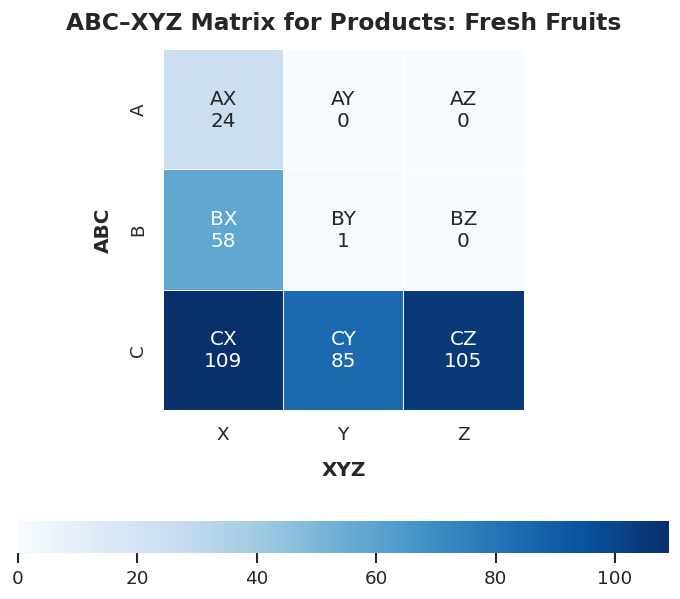

In [45]:
matrix_products = abc_xyz_products.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value=0).reindex(index=abc_order, columns=xyz_order, fill_value=0)


plt.figure(figsize=(7, 6), dpi= 120)

labels = matrix_products.copy().astype(str)
for i in matrix_products.index:
    for j in matrix_products.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix_products.loc[i, j]}"


sns.heatmap(matrix_products, fmt='', cmap='Blues', annot=labels, cbar=True, linewidths=0.5, linecolor='white',
            cbar_kws= {'orientation': 'horizontal', 'pad':0.20}, square=True)
plt.title('ABC–XYZ Matrix for Products: Fresh Fruits', fontsize= 14, fontweight= 'bold', pad= 12)
plt.ylabel('ABC', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.xlabel('XYZ', fontsize= 12, fontweight= 'bold', labelpad= 10);

In [46]:
top_10_fr_fr = abc_xyz_products[(abc_xyz_products['abc_segment']=='A') & 
(abc_xyz_products['xyz_segment']=='X')].nlargest(10, 'proportion')[['product_name', 'proportion']]

tail_10_fr_fr = abc_xyz_products[(abc_xyz_products['abc_segment']=='C') & 
(abc_xyz_products['xyz_segment']=='Z')].nsmallest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop=True)

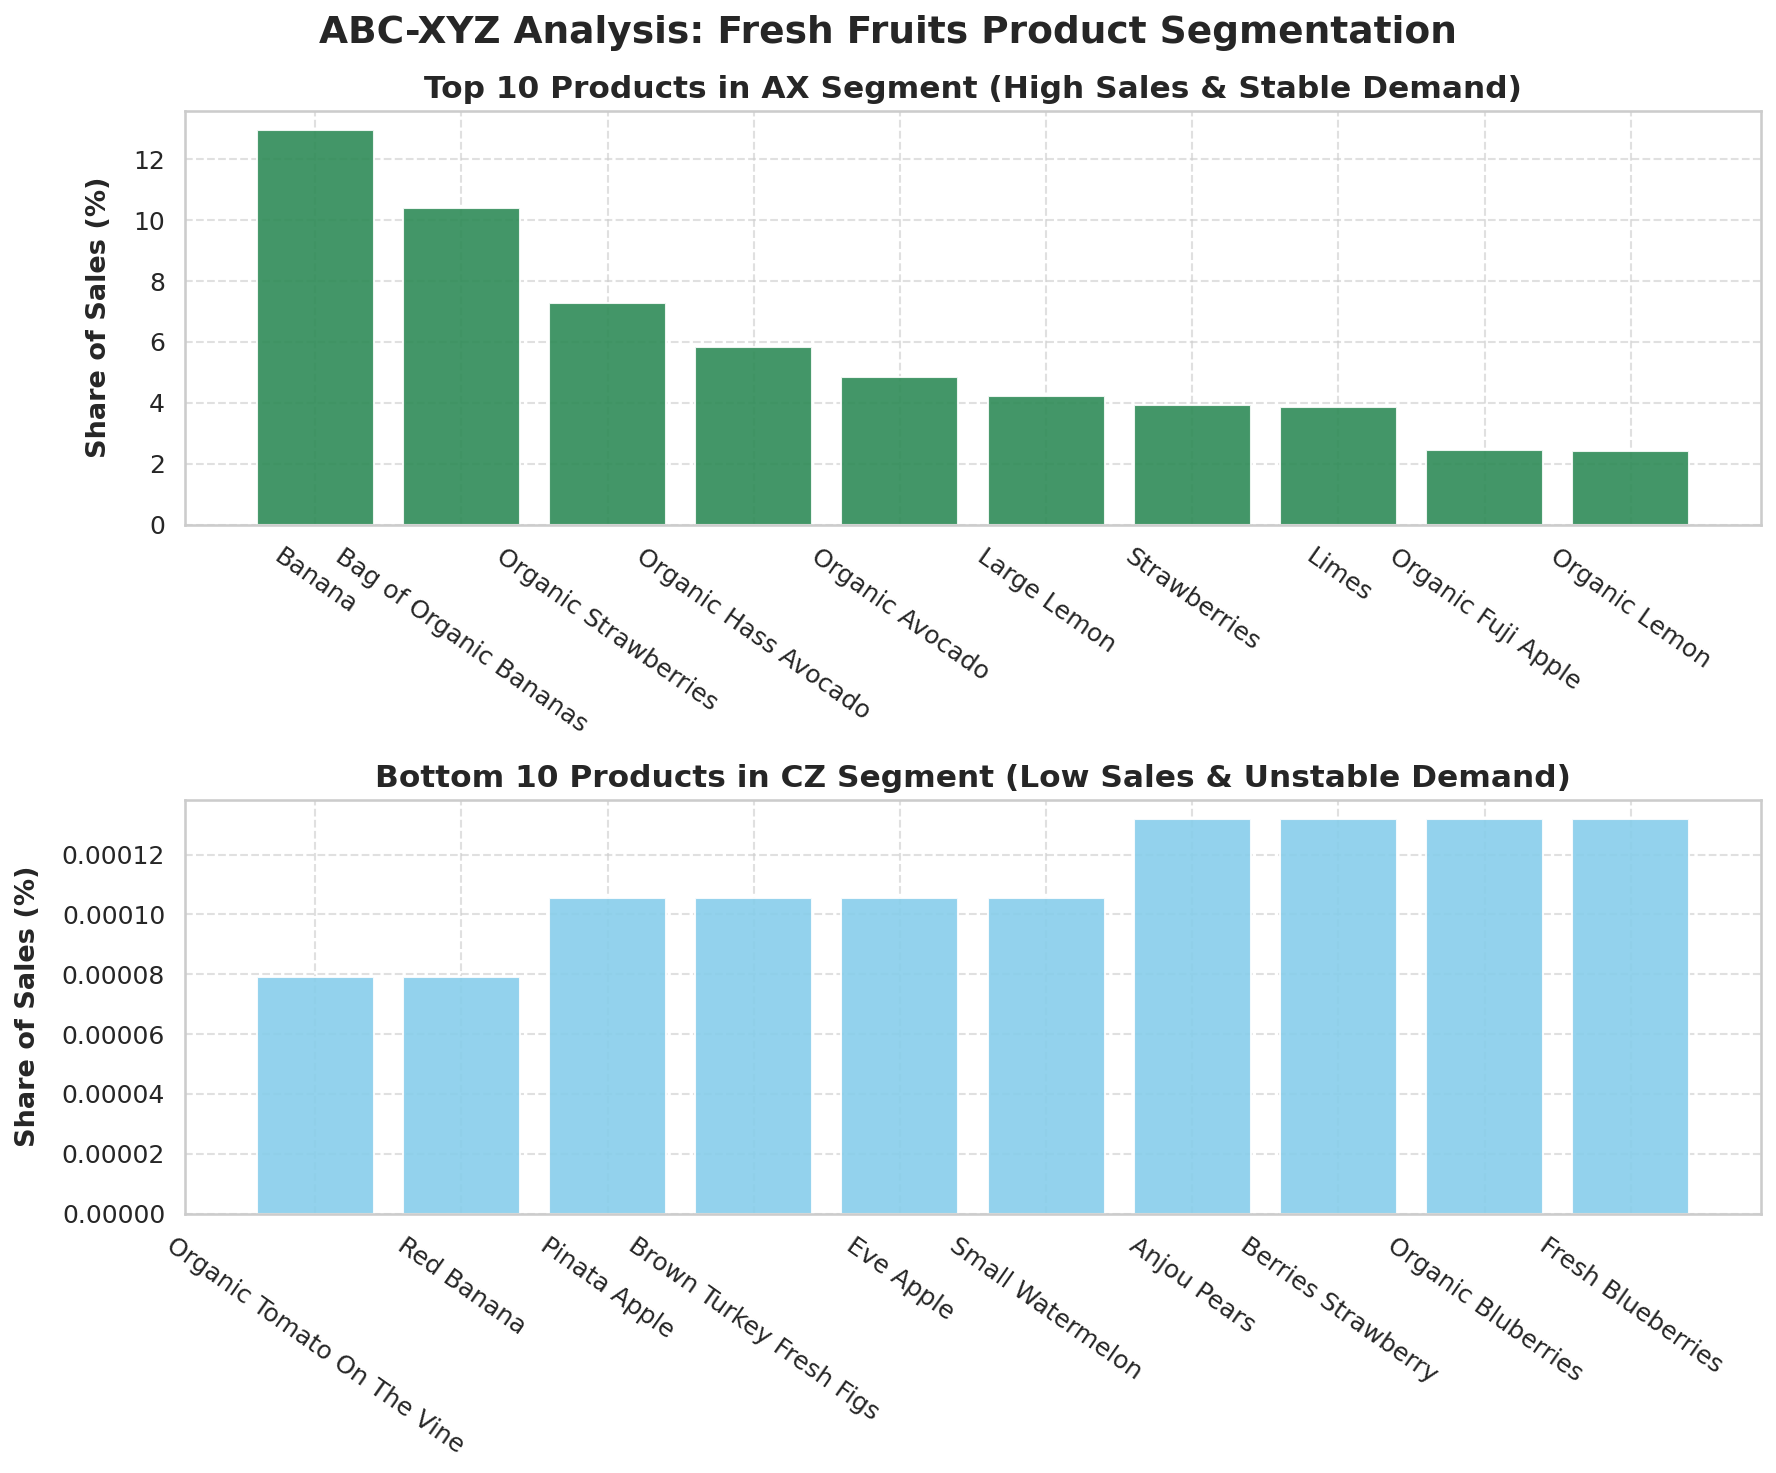

In [47]:
fig, ax= plt.subplots(figsize= (12,10), dpi= 150, nrows= 2, ncols= 1)

ax[0].bar(top_10_fr_fr['product_name'], top_10_fr_fr['proportion'], color= 'seagreen', alpha= 0.9)
ax[1].bar(tail_10_fr_fr['product_name'], tail_10_fr_fr['proportion'], color= 'skyblue', alpha= 0.9)

for a in ax:
    a.grid(True, linestyle='--', alpha=0.6)
    a.tick_params(axis='y', labelsize=12)
    a.tick_params(axis='x', labelsize=12, rotation=325)

fig.suptitle('ABC-XYZ Analysis: Fresh Fruits Product Segmentation', fontsize= 18, fontweight= 'bold')
ax[0].set_title('Top 10 Products in AX Segment (High Sales & Stable Demand)', fontsize= 15, fontweight= 'bold')
ax[0].set_ylabel('Share of Sales (%)', fontsize=13, fontweight='bold', labelpad= 10)
ax[1].set_title('Bottom 10 Products in CZ Segment (Low Sales & Unstable Demand)', fontsize= 15, fontweight= 'bold')
ax[1].set_ylabel('Share of Sales (%)', fontsize=13, fontweight='bold', labelpad= 10)

plt.tight_layout();

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>ABC–XYZ анализ Fresh Fruits</h3>
    <p><b>Что делали:</b> определили вклад продуктов в оборот (ABC) и стабильность спроса (XYZ), собрав их в матрицу.</p>
    <p><b>Ограничения:</b></p>
    <ul>
        <li>Использовали искусственные интервалы времени (<code>days_bin</code>), сезонность не отражена.</li>
        <li>Распределение XYZ получилось экстремальным на уровне полок, но информативнее на уровне продуктов.</li>
    </ul>
    <p><b>Результаты:</b></p>
    <ul>
        <li>AX = 24 продукта (ядро стабильного спроса).</li>
        <li>BX = 58 продуктов (важные, но менее критичные).</li>
        <li>105 продуктов в CZ — длинный хвост хаотичного спроса.</li>
        <li>Топ AX — бананы, клубника, авокадо. Худшие CZ — нишевые и экзотические.</li>
    </ul>
    <p>📌 <b>Инсайт</b>: полка устроена как супермаркет — несколько массовых хитов и длинный хвост ради разнообразия.</p>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>ABC–XYZ Analysis: Fresh Fruits</h3>
    <p><b>What we did:</b> measured sales contribution (ABC) and demand stability (XYZ), combining into a product matrix.</p>
    <p><b>Limitations:</b></p>
    <ul>
        <li>Artificial time bins (<code>days_bin</code>) instead of real dates → no seasonality captured.</li>
        <li>XYZ skewed at aisle level, but more balanced at product level.</li>
    </ul>
    <p><b>Results:</b></p>
    <ul>
        <li>AX = 24 products (core demand).</li>
        <li>BX = 58 products (important, less dominant).</li>
        <li>105 products in CZ (long tail, unstable demand).</li>
        <li>Top AX = bananas, strawberries, avocados. Bottom CZ = niche exotics (figs, rare apples).</li>
    </ul>
    <p>📌 <b>Insight</b>: supermarket-like shelf: a few anchor SKUs drive sales, long tail adds variety.</p>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>

## <span style="color:transparent;">8.3 Products in the Lowest-Share Category: Opportunities & Insights</span>

<div style="
    background: #C5E6FA;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'cursive', cursive; font-size: 42px; font-weight: normal; margin: 0;">
        Products in the Lowest-Share Category: Opportunities & Insights
    </div>
</div>

In [48]:
froz_j_df= full_df[full_df['aisle']=='frozen juice'].reset_index(drop= True).copy()

froz_j_abc = (froz_j_df['product_name'].value_counts(normalize= True)*100).sort_values(ascending=False).reset_index()

froz_j_abc['cum_proportion']= froz_j_abc['proportion'].cumsum()

froz_j_abc['abc_segment']= froz_j_abc['cum_proportion'].apply(abc_segmentation)

In [49]:
prod_bin = (froz_j_df.groupby(['days_bin', 'product_name'], observed= False).size().reset_index(name= 'sales'))

prod_bin_totals = (froz_j_df.groupby('days_bin', observed= False).size().reset_index(name= 'total_sales'))

prod_bin = prod_bin.merge(prod_bin_totals, on= 'days_bin', how= 'left')

prod_bin['share'] = prod_bin['sales'] / prod_bin['total_sales']

froz_j_xyz = (prod_bin.groupby('product_name', observed= False).agg(mean_share= ('share', 'mean'),
         std_share= ('share', 'std')).reset_index())

froz_j_xyz['cv'] = froz_j_xyz['std_share'] / froz_j_xyz['mean_share']

froz_j_xyz['xyz_segment'] = froz_j_xyz['cv'].apply(xyz_segmentation)

In [50]:
abc_xyz_prod = froz_j_abc.merge(froz_j_xyz[['product_name', 'xyz_segment']], how= 'left', on= 'product_name')

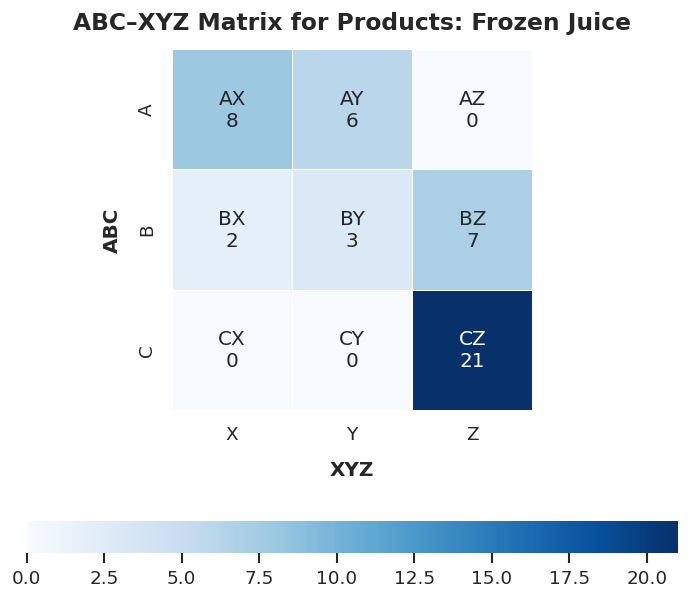

In [51]:
matrix_prod = abc_xyz_prod.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value=0).reindex(index=abc_order, columns=xyz_order, fill_value=0)


plt.figure(figsize=(7, 6), dpi= 120)

labels = matrix_prod.copy().astype(str)
for i in matrix_prod.index:
    for j in matrix_prod.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix_prod.loc[i, j]}"


sns.heatmap(matrix_prod, fmt='', cmap='Blues', annot=labels, cbar=True, linewidths=0.5, linecolor='white',
            cbar_kws= {'orientation': 'horizontal', 'pad':0.20}, square=True)
plt.title('ABC–XYZ Matrix for Products: Frozen Juice', fontsize= 14, fontweight= 'bold', pad= 12)
plt.ylabel('ABC', fontsize= 12, fontweight= 'bold', labelpad= 10)
plt.xlabel('XYZ', fontsize= 12, fontweight= 'bold', labelpad= 10);

In [52]:
top_10_froz_j = abc_xyz_prod[(abc_xyz_prod['abc_segment']=='A') & 
(abc_xyz_prod['xyz_segment']=='X')].nlargest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop=True)

tail_10_froz_j = abc_xyz_prod[(abc_xyz_prod['abc_segment']=='C') & 
(abc_xyz_prod['xyz_segment']=='Z')].nsmallest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop=True)

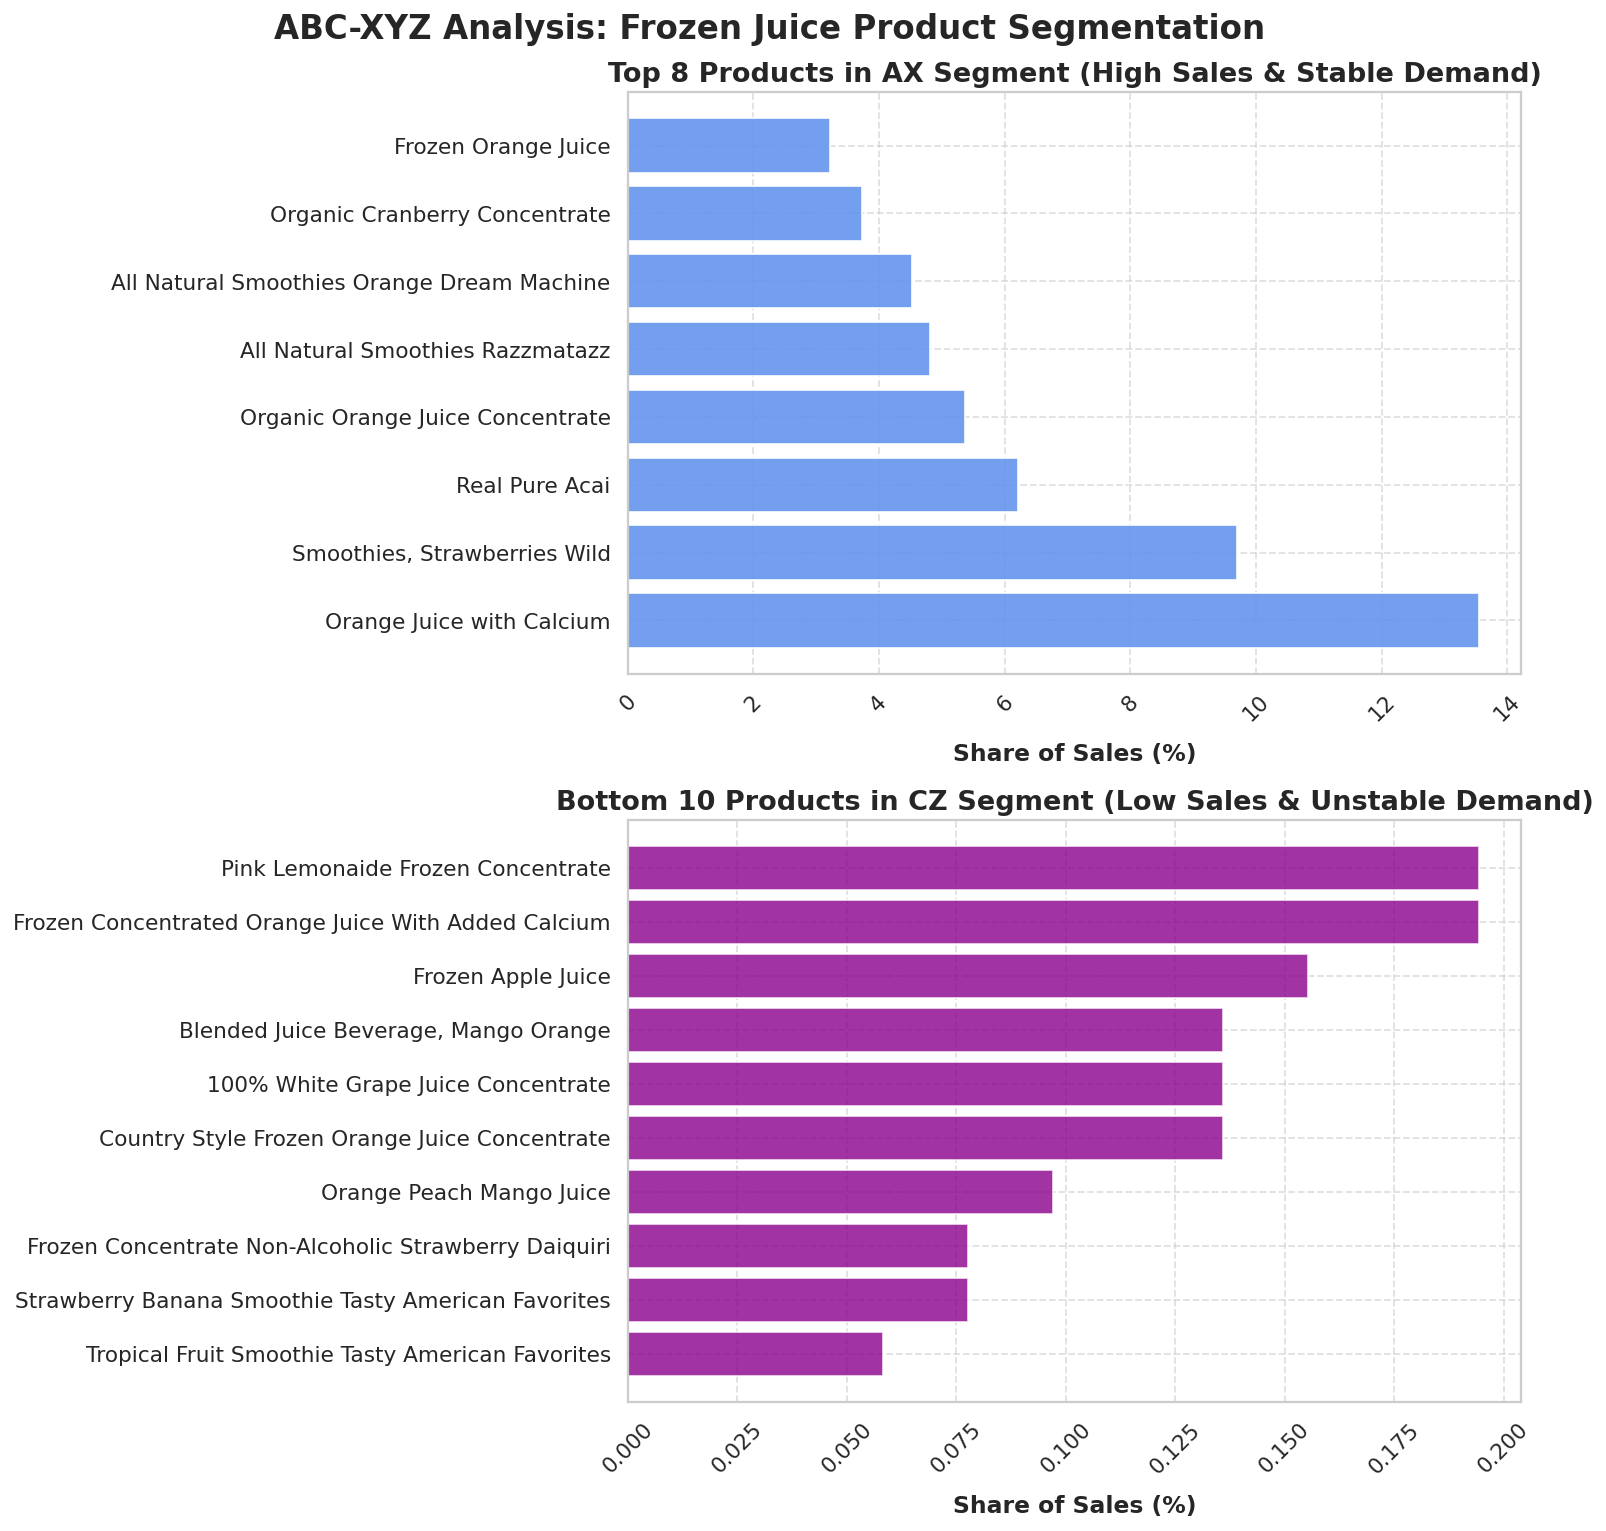

In [53]:
fig, ax= plt.subplots(figsize= (12,12), dpi= 130, nrows= 2, ncols= 1)

ax[0].barh(top_10_froz_j['product_name'], top_10_froz_j['proportion'], color='cornflowerblue', alpha=0.9)
ax[1].barh(tail_10_froz_j['product_name'], tail_10_froz_j['proportion'], color='darkmagenta', alpha=0.8)

for a in ax:
    a.grid(True, linestyle='--', alpha=0.6)
    a.tick_params(axis='y', labelsize=12)
    a.tick_params(axis='x', labelsize=12)


for a in ax:
    a.grid(True, linestyle='--', alpha=0.6)
    a.tick_params(axis='y', labelsize=12)
    a.tick_params(axis='x', labelsize=12, rotation=45)

fig.suptitle('ABC-XYZ Analysis: Frozen Juice Product Segmentation', fontsize= 18, fontweight= 'bold')
ax[0].set_title('Top 8 Products in AX Segment (High Sales & Stable Demand)', fontsize= 15, fontweight= 'bold')
ax[0].set_xlabel('Share of Sales (%)', fontsize=13, fontweight='bold', labelpad= 10)
ax[1].set_title('Bottom 10 Products in CZ Segment (Low Sales & Unstable Demand)', fontsize= 15, fontweight= 'bold')
ax[1].set_xlabel('Share of Sales (%)', fontsize=13, fontweight='bold', labelpad= 10)

plt.tight_layout();

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Выводы по Frozen Juice (ABC-XYZ)</h3>
    <p>Категория <b>Frozen Juice</b> показала значительно меньшую диверсификацию в сравнении с «Fresh Fruits».</p>
    <ul>
        <li>Основной вклад в продажи дают продукты из сегмента <b>AX (8 товаров)</b> — классические апельсиновые соки и смузи.</li>
        <li>В сегменте <b>C</b> — 21 товар, все в Z (нестабильный спрос), что указывает на длинный хвост.</li>
        <li>Практически отсутствует сегмент <b>BZ</b>, рынок поляризован.</li>
        <li>Топ-8 AX товаров дают более 50% продаж категории, CZ почти незаметны.</li>
    </ul>
    <p>📌 <b>Инсайт</b>: категория сосредоточена на нескольких якорных SKU, ассортимент длинного хвоста требует оптимизации.</p>
    <div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        English:
    </div>
    <h3>Frozen Juice Insights (ABC-XYZ)</h3>
    <p>The <b>Frozen Juice</b> category shows a much narrower structure compared to Fresh Fruits.</p>
    <ul>
        <li>Main contribution from <b>AX products (8 items)</b> — mostly classic orange juices and smoothies.</li>
        <li>The <b>C segment</b> (21 items) is entirely Z, showing long-tail unstable demand.</li>
        <li>Virtually no <b>BZ</b> segment, indicating polarization.</li>
        <li>Top-8 AX products make up 50%+ of sales, CZ items negligible.</li>
    </ul>
    <p>📌 <b>Insight</b>: highly concentrated market around a few anchor products; long tail should be streamlined.</p>
    <hr style="margin: 40px 0; border: none; border-top: 1px solid #ccc;">

</div>    

# <span style="color:transparent;">9. Conclusions and Strategic Recommendations</span>

<div style="
    background: #C5E6FA;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #24A1ED;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Georgia', serif; font-size: 42px; font-weight: 600; margin: 0;">
        Conclusions and Strategic Recommendations
    </div>
</div>

<div style="
    background: #C5E6FA;
    border-left: 5px solid #24A1ED;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'cursive', cursive;
    line-height: 1.6;">   
    <div style="color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
        Russian:
    </div>
    <h3>Итоговые выводы</h3>
    <ol>
        <li><b>Повторные заказы (reorders):</b> концентрируются вокруг базовых продуктов. Первые позиции в корзине чаще всего относятся к обязательным товарам (молочные продукты, овощи, напитки) и имеют самый высокий уровень повторных заказов.</li>
        <li><b>RFM и ABC-XYZ анализ:</b> небольшая часть клиентов и товаров формирует основную долю оборота (правило 20/80), что позволяет фокусироваться на удержании ценных сегментов и точечно работать с нестабильными категориями.</li>
        <li><b>Временные паттерны:</b> пик активности между 9–14 часами; воскресенье и понедельник — самые активные дни; ночью заказы почти отсутствуют.</li>
        <li><b>Структура корзины:</b> первые 3–5 товаров в заказе имеют наибольшую вероятность быть повторёнными. Дальнейшие позиции менее предсказуемы и более спонтанны.</li>
        <li><b>Продукты-лидеры:</b> выделяются не только по частоте заказов, но и по высокой вероятности повторного добавления, что позволяет усиливать cross-sell и удержание клиентов.</li>
    </ol>
    <p><b>Рекомендации для бизнеса:</b></p>
    <ul>
        <li>Сфокусировать промо-акции и рассылки на «золотые часы» (9–14) и выходные дни.</li>
        <li>Укреплять удержание клиентов в сегментах «часто и недавно покупающих» (RFM top).</li>
        <li>Продвигать товары с высоким reorder rate в связке с менее стабильными категориями.</li>
        <li>Планировать логистику и ресурсы персональных шопперов с учётом пиковых слотов.</li>
    </ul>


<div style="margin-top: 30px; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
    English:
</div>
<h3>Final Findings</h3>
<ol>
    <li><b>Reorders:</b> concentrated around essential products. First items in the cart (dairy, produce, beverages) show the highest reorder rates.</li>
    <li><b>RFM and ABC-XYZ analysis:</b> a small portion of customers and products generate most revenue (Pareto 20/80), highlighting focus on high-value segments and unstable categories.</li>
    <li><b>Temporal patterns:</b> peak activity 9 AM–2 PM; Sunday and Monday busiest; minimal orders at night.</li>
    <li><b>Cart structure:</b> first 3–5 items most likely to be reordered; later positions more random/spontaneous.</li>
    <li><b>Top-performing products:</b> stand out by frequency and high reorder rate, useful for cross-sell and retention.</li>
</ol>
<p><b>Business recommendations:</b></p>
<ul>
    <li>Target campaigns at golden hours (9 AM–2 PM) and weekends.</li>
    <li>Strengthen retention for high-frequency, recent buyers (top RFM segments).</li>
    <li>Bundle high-reorder products with less stable categories.</li>
    <li>Adjust logistics and personal shopper resources to align with peak times.</li>
</ul>


</div>  
